In [1]:
from allennlp.data import Instance
from allennlp.predictors.predictor import Predictor
#import allennlp.predictors import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/bert-base-srl-2019.06.17.tar.gz")

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import pymongo
import bson
import json
import time
import datetime
import os
import collections
#import smart_open
import random
import sys
import csv
import string
import re
import io
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import OPTICS
import gensim
import gensim.downloader as api
from gensim.summarization import keywords
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import textrazor
import spacy
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = stopwords.words('english')
#stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer("english")
# load nltk's SnowballStemmer as variabled 'stemmer'
info = api.info()
model100 = api.load("glove-twitter-100")
model50 = api.load("glove-twitter-50")
#textrazor.api_key = "00c13d535574ca6d6488f72c09eb4225c9eb87563d91a6aab3113871"
#client = textrazor.TextRazor(extractors=["entities", "topics"])
from symspellpy.symspellpy import SymSpell, Verbosity
print(stopwords[:10])

[nltk_data] Downloading package words to /home/abose/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/abose/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /home/abose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/abose/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/abose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [4]:
#textrazor.api_key = "92ce797b24384252d56b33c30190fc16f1e9bc1a58c6dbf200f32955"
textrazor.api_key = "00c13d535574ca6d6488f72c09eb4225c9eb87563d91a6aab3113871"
#textrazor.api_key = "71121eb10cdfa6563da02b79bf602092dff0e2c830dceca1cb61259c"
#textrazor.api_key = "be1ab23138902cc6cc2077ce1163e8c3bd93759ec3b1ce9dcbf30c63"
#textrazor.api_key ="9c17ac598994729ea83d58baf11ce5ed2563d9965a6c2c8b46a24bca"
#textrazor.api_key ="7afa15a464f419f9dd7a4fa8924554596f104417b967bc8bb28893df"
client = textrazor.TextRazor(extractors=["entities", "topics"])

In [5]:
# connection=pymongo.MongoClient()
# threatDB=connection.threatcopy
# collection=threatDB.tweets
# cursor=collection.find({"relevant":True},{"_id":0, "tweet.text":1, "tweet.truncated":1, "tweet.user.id_str":1,"tweet.user.followers_count":1,"tweet.extended_tweet.full_text":1, "tweet.created_at":1, "tweet.is_quote_status":1, "tweet.quoted_status.text":1, "tweet.quoted_status.user.id_str":1,"tweet.quoted_status.user.followers_count":1,"tweet.quoted_status.truncated":1, "tweet.quoted_status.extended_tweet.full_text":1}).limit(21000)
# tweetStoreObjectData=[]
# for data in cursor:
#     #print("******")
#     for key1, value1 in data.items():
#         #print("KEY ",key1, " VALUE ",value1)
#         tweetStoreObjectData.append(value1)
# #print(tweetStoreObjectData)
# #ts = [time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(item['created_at'],'%a %b %d %H:%M:%S +0000 %Y')) for item in tweetStoreObjectData]
# tsC = [datetime.datetime.strptime(item['created_at'],'%a %b %d %H:%M:%S +0000 %Y') for item in tweetStoreObjectData]
# modifieDf=pd.DataFrame(tsC)
# modifieDf.columns=["created_at"]
# df=pd.DataFrame(data=tweetStoreObjectData)
# df["created_at"]=modifieDf["created_at"]
# df=df.sort_values(by=["created_at"], ascending=False)
# df=df.reset_index(drop=True)
# df.to_csv('checking_for_own_purpose.csv', sep='\t')
# tweetText=[row['text'] if not row['is_quote_status'] else row['quoted_status'] for index, row in df.iterrows()]
# with io.open("checking_text.csv", 'w', encoding="utf-8") as f:
#     for s in tweetText:
#         f.write(str(s) + '\n')
# df.head()
# dataFrameSize=len(df.index)-1
# print(" dataFrameSize ",dataFrameSize)

# ###########################
# createTimeList=[]
# t4 = datetime.datetime(year = 2018, month = 8, day = 30, hour = 0, minute = 0, second = 0)
# t5 = datetime.datetime(year = 2018, month = 9, day = 12, hour = 10, minute = 7, second = 0)
# intervalText=[]
# totalTweetText=[]
# for col, value in df.iterrows():
#     if np.datetime64(df["created_at"][col])>=t4 and np.datetime64(df["created_at"][col])<=t5:
#         #print("value-> ",value["created_at"])
#         createTimeList.append(value["created_at"])
#         if not value['is_quote_status']:
#             if not value['truncated']:
#                 #print(" *** ", value)
#                 intervalText.append(value['text'])
#                 totalTweetText.append(value['text'])
#             if value['truncated']:
#                 intervalText.append(value['extended_tweet']['full_text'])
#                 totalTweetText.append(value['extended_tweet']['full_text'])
#         else:
#             if not pd.isnull(value['quoted_status']):
#                 #print(" +++ ", value)
#                 if not value['quoted_status']['truncated']:
#                     intervalText.append(value['quoted_status']['text'])
#                     totalTweetText.append(value['quoted_status']['text'])
#                 if value['quoted_status']['truncated']:
#                     intervalText.append(value['quoted_status']['extended_tweet']['full_text'])
#                     totalTweetText.append(value['quoted_status']['extended_tweet']['full_text'])
#             if pd.isnull(value['quoted_status']):
#                 if not value['truncated']:
#                     intervalText.append(value['text'])
#                     totalTweetText.append(value['text'])
#                 if value['truncated']:
#                     intervalText.append(value['extended_tweet']['full_text'])
#                     totalTweetText.append(value['extended_tweet']['full_text'])
# excelTextDataFrame={'TweetText':totalTweetText}
# excelTextDataFrame=pd.DataFrame(excelTextDataFrame)
# excelTextDataFrame=excelTextDataFrame.reset_index(drop=True)
# print(excelTextDataFrame.head(5))
# excelTextDataFrame.to_csv('tweetTextCheckRPE',sep='\t')
###########################
totalTweetText=list()
tempDf = pd.read_csv('tweetTextCheck.csv',sep=',', engine='python')
for dfIndex, dfRow in tempDf.iterrows():
    print(dfRow[1])
    totalTweetText.append(dfRow[1])
#print(len(totalTweetText))

i appreciate the love for hacking guys, but let's not DDoS our own fkn stream. 

RIP #technotherapy w/ @aboveandbeyond
@i_oofficial is such a great hacker he made his viewers DDOS Group Therapy for him.
Cybersecurity Experts Point to Iran for Bitcoin Ransomware - https://t.co/mIHohuugZB
💰Domain auction ⏳
Domain name: https://t.co/zZdYBVk4ol
Start: $150 💵
Reserve price: TBA

To be the first person to bid reply on Twitter  in comments with 
“hugeleak $150”.  💣 Auction ends 3rd September #domainauction #domains
#Depressed #Security Researcher Drops Serious #0Day for fully patched #Windows #Exploit On Twitter with #ProofOfConcept Code
#CERT verified the exploit code as local privilege escalation 
https://t.co/U3cip4WdiY https://t.co/jqpjL3Kf1A
An infinite loop vulnerability was found in libtirpc before version 1.0.2-rc2 that allows server to enter an infinite loop. https://t.co/fcZ4vzm1VA #cybersecurity #linux
https://t.co/YgB9MJNChW uses ad-blocker bypass technology which increases your v

In [6]:
tempDf.shape

(302, 6)

In [7]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [8]:
light_verbs = {"give", "given", "gave", "giving", "make", "made", "making", "have", "has", "had", "having", "take", "took", "taking", "taken", "do", "did", "done", "offer", "offered", "offering", "pay", "paid", "paying", "put", "putting", "raise", "raised", "raising", "get", "got", "gotten", "does", "takes", "raises", "pays", "offers", "gives", "makes", "gets", "is","be", "go", "goes", "going", "are", "am", "sets", "set", "setting", "let", "letting", "will", "shall", "would", "should", "can", "could", "mean", "meaning", "means", "run", "running", "runs", "ran", "meant", "aim", "aims", "aimed", "aiming", "shed", "sheds", "shedding", "was", "were", "become", "bocomes", "becoming", "gone"}

In [9]:
tempTotalTweetText=list()
for indText, valText in enumerate(totalTweetText):
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in valText.split(" ")])
    tempTotalTweetText.append(newString)
totalTweetText=tempTotalTweetText
totalTweetText

['i appreciate the love for hacking guys, but let us not DDoS our own fkn stream. \n\nRIP #technotherapy w/ @aboveandbeyond',
 '@i_oofficial is such a great hacker he made his viewers DDOS Group Therapy for him.',
 'Cybersecurity Experts Point to Iran for Bitcoin Ransomware - https://t.co/mIHohuugZB',
 '💰Domain auction ⏳\nDomain name: https://t.co/zZdYBVk4ol\nStart: $150 💵\nReserve price: TBA\n\nTo be the first person to bid reply on Twitter  in comments with \n“hugeleak $150”.  💣 Auction ends 3rd September #domainauction #domains',
 '#Depressed #Security Researcher Drops Serious #0Day for fully patched #Windows #Exploit On Twitter with #ProofOfConcept Code\n#CERT verified the exploit code as local privilege escalation \nhttps://t.co/U3cip4WdiY https://t.co/jqpjL3Kf1A',
 'An infinite loop vulnerability was found in libtirpc before version 1.0.2-rc2 that allows server to enter an infinite loop. https://t.co/fcZ4vzm1VA #cybersecurity #linux',
 'https://t.co/YgB9MJNChW uses ad-blocker byp

In [10]:
def hook_compound(input_termList):
    # maximum edit distance per dictionary precalculation
    symSpell_1st_TotalTweetText=[]
    max_edit_distance_dictionary = 2
    prefix_length = 7
    # create object
    sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)
    # load dictionary
    dictionary_path = os.path.join(os.path.dirname("/home/abose/Threat Intel/"),"frequency_dictionary_en_82_765.txt")
    term_index = 0  # column of the term in the dictionary text file
    count_index = 1  # column of the term frequency in the dictionary text file
    if not sym_spell.load_dictionary(dictionary_path, term_index, count_index):
        print("Dictionary file not found")
        return

    # lookup suggestions for single-word input strings
    input_term = "memebers"  # misspelling of "members"
    # max edit distance per lookup
    # (max_edit_distance_lookup <= max_edit_distance_dictionary)
    max_edit_distance_lookup = 2
    suggestion_verbosity = Verbosity.CLOSEST  # TOP, CLOSEST, ALL
    suggestions = sym_spell.lookup(input_term, suggestion_verbosity,
                                   max_edit_distance_lookup)
    # display suggestion term, term frequency, and edit distance
    #for suggestion in suggestions:
        #print("{}, {}, {}".format(suggestion.term, suggestion.count, suggestion.distance))

    
    # max edit distance per lookup (per single word, not per whole input string)
    max_edit_distance_lookup = 2
    for i, input_term2 in enumerate(input_termList):
        input_term2 = re.sub(r"http\S+", "", input_term2)
        suggestions = sym_spell.lookup_compound(input_term2,
                                            max_edit_distance_lookup)
        for suggestion in suggestions:
            symSpell_1st_TotalTweetText.append(suggestion.term)
            
    # display suggestion term, edit distance, and term frequency
    #for suggestion in suggestions:
        #print("{}, {}, {}".format(suggestion.term, suggestion.count,
                                  #suggestion.distance))
    return symSpell_1st_TotalTweetText

In [11]:
def mainLookUp(input_termLookList):
    symSpell_2nd_TotalTweetText=[]
    # maximum edit distance per dictionary precalculation
    max_edit_distance_dictionary = 0
    prefix_length = 7
    # create object
    sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)
    # load dictionary
    dictionary_path = os.path.join(os.path.dirname("/home/abose/Threat Intel/"),"frequency_dictionary_en_82_765.txt")
    print(dictionary_path)
    term_index = 0  # column of the term in the dictionary text file
    count_index = 1  # column of the term frequency in the dictionary text file
    if not sym_spell.load_dictionary(dictionary_path, term_index, count_index):
        print("Dictionary file not found")
        return

    # a sentence without any spaces
    input_term = "thequickbrownfoxjumpsoverthelazydog"
    for i, input_term3 in enumerate(input_termLookList):
        #print(input_term3,", ",len(input_term3))
        if input_term3:
            result = sym_spell.word_segmentation(input_term3)
            symSpell_2nd_TotalTweetText.append(result.corrected_string)
    # display suggestion term, term frequency, and edit distance
    #print("{}, {}, {}".format(result.corrected_string, result.distance_sum,
                              #result.log_prob_sum))
    return symSpell_2nd_TotalTweetText

In [12]:
#input_term2 = ("The Week in Ransomware - February 16th 2018 - NotPetya &amp; Saturn https://t.co/vJkTq752wQ #RansomwareProtection #Security")
lookupText=hook_compound(totalTweetText)
symSpellFinalText=mainLookUp(lookupText)
print(symSpellFinalText)

/home/abose/Threat Intel/frequency_dictionary_en_82_765.txt
['i appreciate the love for hacking guys but let us not dos our own fun stream rip techno therapy a above beyond', 'i official is such a great hacker he made his viewers dos group therapy for him', 'cube security experts point to iran for bit coin ransom are', 'domain auction domain name start a of reserve price tea to be the first person to bid reply on twitter in comments with huge leak a of auction ends ord september domain auction domains', 'depressed security researcher drops serious day for fully patched windows exploit on twitter with proof concept code cert verified the exploit code as local privilege escalation', 'an infinite loop vulnerability was found in list pc before version a a a rcd that allows server to enter an infinite loop cube security linux', 'uses and blocker bypass technology which increases your vulnerability to infection from advertising malicious ads cube security business small biz startup', 'hey ja

In [13]:
# textList=list()
# textList.append("A cyber attack has been committed in csedu by north korean")
# textList.append("A cyber attack has been committed in csedu by north korea hackers")
# textList.append("A cyber attack has been committed in Csedu by North Korean hackers")
# textList.append("A cyber attack has been committed in CSEDU by North Korea hackers")
textList=symSpellFinalText

In [14]:
srlTag=list()
for idTl, valTl in enumerate(textList):
    srlTag.append(predictor.predict(sentence=valTl))
#srlTag=predictor.predict(sentence=textList[0])

In [15]:
print(type(srlTag),srlTag)

<class 'list'> [{'verbs': [{'verb': 'appreciate', 'description': '[ARG0: i] [V: appreciate] [ARG1: the love for hacking guys] but let us not dos our own fun stream rip techno therapy a above beyond', 'tags': ['B-ARG0', 'B-V', 'B-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}, {'verb': 'hacking', 'description': 'i appreciate the love for [V: hacking] [ARG1: guys] but let us not dos our own fun stream rip techno therapy a above beyond', 'tags': ['O', 'O', 'O', 'O', 'O', 'B-V', 'B-ARG1', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}, {'verb': 'let', 'description': 'i appreciate the love for hacking guys but [V: let] [ARG1: us not dos our own fun stream rip techno therapy a above beyond]', 'tags': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-V', 'B-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1']}, {'verb': 'd

## The following Code block introduces a list named "storeLastKeyVals" to keep information of "verb", "description" and "tags" of each role labeled text in a key-value pair dictionary named "lastKeyVal" ##

In [16]:
storeLastKeyVals=list()
for idStrTag, valStrTag in enumerate(srlTag):
    if 'verbs' in valStrTag.keys():
        lastKeyVal=dict()
        if len(valStrTag['verbs'])>0:
            if str(valStrTag['verbs'][-1]['verb']) not in light_verbs:
                #print("#######################################################", valStrTag['verbs'][-1]['verb'])
                lastKeyVal['verb']=valStrTag['verbs'][-1]['verb']
                lastKeyVal['description']=valStrTag['verbs'][-1]['description']
                lastKeyVal['tags']=valStrTag['verbs'][-1]['tags']
            elif len(valStrTag['verbs'])>1 and len(valStrTag['verbs'][-2]['verb'])>=2:
                #print("++++++++++++++++++++++++++++++++++++++++++++++++++++++", valStrTag['verbs'][-2]['verb'])
                lastKeyVal['verb']=valStrTag['verbs'][-2]['verb']
                lastKeyVal['description']=valStrTag['verbs'][-2]['description']
                lastKeyVal['tags']=valStrTag['verbs'][-2]['tags']
            else:
                #print("*****************************************************", valStrTag['verbs'][0]['verb'])
                lastKeyVal['verb']=valStrTag['verbs'][0]['verb']
                lastKeyVal['description']=valStrTag['verbs'][0]['description']
                lastKeyVal['tags']=valStrTag['verbs'][0]['tags']
        #for ind, listObject in enumerate(valStrTag['verbs']):
            ##print(ind, " --- ", listObject)
            ##lastKeyVal=dict()
            #for key1, value1 in  listObject.items():
                #lastKeyVal['verb']=listObject['verb']
                #lastKeyVal['description']=listObject['description']
                #lastKeyVal['tags']=listObject['tags']
                ##print(key1," ++++", value1)
            ##print(" *** ", lastKeyVal)
        storeLastKeyVals.append(lastKeyVal)

In [17]:
storeLastKeyVals

[{'verb': 'dos',
  'description': 'i appreciate the love for hacking guys but let [ARG0: us] [ARGM-NEG: not] [V: dos] [ARG1: our own fun stream rip techno therapy] [ARG2: a above beyond]',
  'tags': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-ARG0',
   'B-ARGM-NEG',
   'B-V',
   'B-ARG1',
   'I-ARG1',
   'I-ARG1',
   'I-ARG1',
   'I-ARG1',
   'I-ARG1',
   'I-ARG1',
   'B-ARG2',
   'I-ARG2',
   'I-ARG2']},
 {'verb': 'dos',
  'description': 'i official is such a great hacker he made [ARG0: his viewers] [V: dos] [ARG1: group therapy] [ARG2: for him]',
  'tags': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-ARG0',
   'I-ARG0',
   'B-V',
   'B-ARG1',
   'I-ARG1',
   'B-ARG2',
   'I-ARG2']},
 {'verb': 'iran',
  'description': 'cube security experts point to [V: iran] for bit coin ransom are',
  'tags': ['O', 'O', 'O', 'O', 'O', 'B-V', 'O', 'O', 'O', 'O', 'O']},
 {'verb': 'ends',
  'description': 'domain auction domain name start a

In [18]:
#print(lastKeyVal['description']," ->  ", type(lastKeyVal['description']))

## The following code block works to tag parts of speech for each given sentence. It returns a list named "postList" and save it to another list named "retPostList".

In [19]:
retPostList=list()
def preprocess(sent):
    postList=list()
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    #print(sent)
    for posInd, posTag in enumerate(sent):
        #print(posTag)
        postList.append((sent[posInd][0],sent[posInd][1]))
    return postList
for idTextList, valTextList in enumerate(textList):
    retPostList.append(preprocess(valTextList))
#print("sent-> ", type(retPostList),"  ", retPostList)

In [20]:
print(storeLastKeyVals[0]['tags'])
print(retPostList[0], type(retPostList[0][1][1]))
#print(len(textList))

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ARG0', 'B-ARGM-NEG', 'B-V', 'B-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'B-ARG2', 'I-ARG2', 'I-ARG2']
[('i', 'NN'), ('appreciate', 'VBP'), ('the', 'DT'), ('love', 'NN'), ('for', 'IN'), ('hacking', 'VBG'), ('guys', 'NNS'), ('but', 'CC'), ('let', 'VB'), ('us', 'PRP'), ('not', 'RB'), ('dos', 'VB'), ('our', 'PRP$'), ('own', 'JJ'), ('fun', 'NN'), ('stream', 'NN'), ('rip', 'NN'), ('techno', 'NN'), ('therapy', 'NN'), ('a', 'DT'), ('above', 'IN'), ('beyond', 'IN')] <class 'str'>


## Store features of each token such as 'doc id', 'token', 'pos' and 'arg+IOB' in four list named "docList", "tokenList", "posList" and "tagList" respectively. Afterwards assign the lists using four keys to a dictionary named "textDict".

In [21]:
textDict=dict()
docList=list()
tokenList=list()
posList=list()
tagList=list()
for textInd, text in enumerate(textList):
    featureList=list()
    #print(textInd, " -- ",type(storeLastKeyVals[textInd]), " --- ",storeLastKeyVals[textInd])
    if not storeLastKeyVals[textInd]:
        print("*** Keno Aschis ***")
    if storeLastKeyVals[textInd]:
        if storeLastKeyVals[textInd]['tags']:
            for tagInd, tag, in enumerate(storeLastKeyVals[textInd]['tags']):
                if tagInd <= len(retPostList[textInd])-1:
                    print(textInd, " +++ ",tagInd," --- ", len(retPostList[textInd]),retPostList[textInd])
                    docList.append(textInd)
                    tokenList.append(retPostList[textInd][tagInd][0])
                    posList.append(retPostList[textInd][tagInd][1])
                    tagList.append(tag)
textDict['doc']=docList
textDict['token']=tokenList
textDict['pos']=posList
textDict['tag']=tagList
#print(textDict)

0  +++  0  ---  22 [('i', 'NN'), ('appreciate', 'VBP'), ('the', 'DT'), ('love', 'NN'), ('for', 'IN'), ('hacking', 'VBG'), ('guys', 'NNS'), ('but', 'CC'), ('let', 'VB'), ('us', 'PRP'), ('not', 'RB'), ('dos', 'VB'), ('our', 'PRP$'), ('own', 'JJ'), ('fun', 'NN'), ('stream', 'NN'), ('rip', 'NN'), ('techno', 'NN'), ('therapy', 'NN'), ('a', 'DT'), ('above', 'IN'), ('beyond', 'IN')]
0  +++  1  ---  22 [('i', 'NN'), ('appreciate', 'VBP'), ('the', 'DT'), ('love', 'NN'), ('for', 'IN'), ('hacking', 'VBG'), ('guys', 'NNS'), ('but', 'CC'), ('let', 'VB'), ('us', 'PRP'), ('not', 'RB'), ('dos', 'VB'), ('our', 'PRP$'), ('own', 'JJ'), ('fun', 'NN'), ('stream', 'NN'), ('rip', 'NN'), ('techno', 'NN'), ('therapy', 'NN'), ('a', 'DT'), ('above', 'IN'), ('beyond', 'IN')]
0  +++  2  ---  22 [('i', 'NN'), ('appreciate', 'VBP'), ('the', 'DT'), ('love', 'NN'), ('for', 'IN'), ('hacking', 'VBG'), ('guys', 'NNS'), ('but', 'CC'), ('let', 'VB'), ('us', 'PRP'), ('not', 'RB'), ('dos', 'VB'), ('our', 'PRP$'), ('own', 'JJ

28  +++  14  ---  15 [('acc', 'NN'), ('claims', 'NNS'), ('of', 'IN'), ('dos', 'JJ'), ('net', 'JJ'), ('neutrality', 'NN'), ('attack', 'NN'), ('were', 'VBD'), ('bogus', 'JJ'), ('focus', 'NN'), ('fix', 'NN'), ('my', 'PRP$'), ('computer', 'NN'), ('onsite', 'RB'), ('com', 'NN')]
29  +++  0  ---  45 [('ave', 'NN'), ('of', 'IN'), ('of', 'IN'), ('16278', 'CD'), ('phpkai', 'NNS'), ('yuan', 'JJ'), ('cms', 'NN'), ('php', 'NN'), ('open', 'JJ'), ('source', 'NN'), ('cms', 'NN'), ('posts', 'NNS'), ('of', 'IN'), ('a', 'DT'), ('a', 'DT'), ('allows', 'VBZ'), ('an', 'DT'), ('unauthenticated', 'JJ'), ('user', 'NN'), ('to', 'TO'), ('execute', 'VB'), ('arbitrary', 'JJ'), ('sol', 'NN'), ('commands', 'NNS'), ('via', 'IN'), ('the', 'DT'), ('day', 'NN'), ('module', 'VBZ'), ('member', 'NN'), ('controllers', 'NNS'), ('apr', 'VBP'), ('pop', 'NN'), ('ajax', 'NN'), ('save', 'VBP'), ('draft', 'NN'), ('function', 'NN'), ('with', 'IN'), ('the', 'DT'), ('dir', 'NN'), ('par', 'NN'), ('vul', 'NN'), ('mon', 'NN'), ('vulner

64  +++  7  ---  31 [('the', 'DT'), ('malware', 'NN'), ('that', 'WDT'), ('infected', 'VBD'), ('the', 'DT'), ('world', 'NN'), ('reinvents', 'VBZ'), ('itself', 'PRP'), ('fox', 'JJ'), ('news', 'NN'), ('info', 'NN'), ('sec', 'JJ'), ('security', 'NN'), ('cube', 'NN'), ('security', 'NN'), ('data', 'NNS'), ('reach', 'VBP'), ('data', 'NN'), ('protection', 'NN'), ('cube', 'NN'), ('attack', 'NN'), ('cube', 'NN'), ('war', 'NN'), ('hacker', 'NN'), ('malware', 'NN'), ('botnet', 'NN'), ('ransom', 'NN'), ('are', 'VBP'), ('tech', 'JJ'), ('news', 'NN'), ('it', 'PRP')]
64  +++  8  ---  31 [('the', 'DT'), ('malware', 'NN'), ('that', 'WDT'), ('infected', 'VBD'), ('the', 'DT'), ('world', 'NN'), ('reinvents', 'VBZ'), ('itself', 'PRP'), ('fox', 'JJ'), ('news', 'NN'), ('info', 'NN'), ('sec', 'JJ'), ('security', 'NN'), ('cube', 'NN'), ('security', 'NN'), ('data', 'NNS'), ('reach', 'VBP'), ('data', 'NN'), ('protection', 'NN'), ('cube', 'NN'), ('attack', 'NN'), ('cube', 'NN'), ('war', 'NN'), ('hacker', 'NN'), ('

99  +++  9  ---  10 [('sony', 'NN'), ('and', 'CC'), ('microsoft', 'JJ'), ('game', 'NN'), ('sites', 'VBZ'), ('knew', 'VBD'), ('dos', 'JJ'), ('attacks', 'NNS'), ('were', 'VBD'), ('coming', 'VBG')]
100  +++  0  ---  33 [('malta', 'NN'), ('stick', 'NN'), ('bungee', 'NN'), ('i', 'NN'), ('know', 'VBP'), ('its', 'PRP$'), ('not', 'RB'), ('bunnies', 'NNS'), ('fault', 'VBP'), ('for', 'IN'), ('the', 'DT'), ('dos', 'JJ'), ('bit', 'NN'), ('i', 'JJ'), ('think', 'VBP'), ('a', 'DT'), ('little', 'RB'), ('more', 'RBR'), ('should', 'MD'), ('be', 'VB'), ('done', 'VBN'), ('for', 'IN'), ('the', 'DT'), ('victims', 'NNS'), ('that', 'WDT'), ('is', 'VBZ'), ('a', 'DT'), ('time', 'NN'), ('investment', 'NN'), ('i', 'NN'), ('wont', 'VBP'), ('get', 'VB'), ('back', 'RB')]
100  +++  1  ---  33 [('malta', 'NN'), ('stick', 'NN'), ('bungee', 'NN'), ('i', 'NN'), ('know', 'VBP'), ('its', 'PRP$'), ('not', 'RB'), ('bunnies', 'NNS'), ('fault', 'VBP'), ('for', 'IN'), ('the', 'DT'), ('dos', 'JJ'), ('bit', 'NN'), ('i', 'JJ'), ('

131  +++  23  ---  25 [('man', 'NN'), ('like', 'IN'), ('jimmy', 'JJ'), ('bungee', 'NN'), ('until', 'IN'), ('bungee', 'NNS'), ('do', 'VBP'), ('something', 'NN'), ('about', 'IN'), ('people', 'NNS'), ('using', 'VBG'), ('dos', 'JJ'), ('then', 'RB'), ('there', 'EX'), ('int', 'RB'), ('much', 'JJ'), ('we', 'PRP'), ('can', 'MD'), ('do', 'VB'), ('happened', 'VBD'), ('to', 'TO'), ('me', 'PRP'), ('the', 'DT'), ('other', 'JJ'), ('week', 'NN')]
131  +++  24  ---  25 [('man', 'NN'), ('like', 'IN'), ('jimmy', 'JJ'), ('bungee', 'NN'), ('until', 'IN'), ('bungee', 'NNS'), ('do', 'VBP'), ('something', 'NN'), ('about', 'IN'), ('people', 'NNS'), ('using', 'VBG'), ('dos', 'JJ'), ('then', 'RB'), ('there', 'EX'), ('int', 'RB'), ('much', 'JJ'), ('we', 'PRP'), ('can', 'MD'), ('do', 'VB'), ('happened', 'VBD'), ('to', 'TO'), ('me', 'PRP'), ('the', 'DT'), ('other', 'JJ'), ('week', 'NN')]
132  +++  0  ---  14 [('emergency', 'NN'), ('fix', 'NN'), ('for', 'IN'), ('windows', 'NNS'), ('of', 'IN'), ('task', 'NN'), ('sch

161  +++  17  ---  38 [('unofficial', 'JJ'), ('patch', 'NN'), ('available', 'JJ'), ('for', 'IN'), ('latest', 'JJS'), ('windows', 'NNS'), ('zero', 'CD'), ('day', 'NN'), ('exploit', 'CC'), ('while', 'IN'), ('microsoft', 'NN'), ('is', 'VBZ'), ('still', 'RB'), ('working', 'VBG'), ('on', 'IN'), ('fixing', 'VBG'), ('a', 'DT'), ('recently', 'RB'), ('disclosed', 'VBN'), ('privilege', 'NN'), ('escalation', 'NN'), ('vulnerability', 'NN'), ('in', 'IN'), ('windows', 'NNS'), ('security', 'NN'), ('firm', 'NN'), ('across', 'IN'), ('security', 'NN'), ('has', 'VBZ'), ('stepped', 'VBN'), ('in', 'IN'), ('to', 'TO'), ('provide', 'VB'), ('a', 'DT'), ('temporary', 'JJ'), ('patch', 'NN'), ('for', 'IN'), ('the', 'DT')]
161  +++  18  ---  38 [('unofficial', 'JJ'), ('patch', 'NN'), ('available', 'JJ'), ('for', 'IN'), ('latest', 'JJS'), ('windows', 'NNS'), ('zero', 'CD'), ('day', 'NN'), ('exploit', 'CC'), ('while', 'IN'), ('microsoft', 'NN'), ('is', 'VBZ'), ('still', 'RB'), ('working', 'VBG'), ('on', 'IN'), ('fi

197  +++  15  ---  19 [('new', 'JJ'), ('post', 'NN'), ('skype', 'NN'), ('empress', 'NN'), ('rial', 'JJ'), ('office', 'NN'), ('a', 'DT'), ('of', 'IN'), ('of', 'IN'), ('a', 'DT'), ('10730', 'CD'), ('20053', 'CD'), ('denial', 'NN'), ('of', 'IN'), ('service', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('published', 'VBN'), ('on', 'IN')]
197  +++  16  ---  19 [('new', 'JJ'), ('post', 'NN'), ('skype', 'NN'), ('empress', 'NN'), ('rial', 'JJ'), ('office', 'NN'), ('a', 'DT'), ('of', 'IN'), ('of', 'IN'), ('a', 'DT'), ('10730', 'CD'), ('20053', 'CD'), ('denial', 'NN'), ('of', 'IN'), ('service', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('published', 'VBN'), ('on', 'IN')]
197  +++  17  ---  19 [('new', 'JJ'), ('post', 'NN'), ('skype', 'NN'), ('empress', 'NN'), ('rial', 'JJ'), ('office', 'NN'), ('a', 'DT'), ('of', 'IN'), ('of', 'IN'), ('a', 'DT'), ('10730', 'CD'), ('20053', 'CD'), ('denial', 'NN'), ('of', 'IN'), ('service', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('published', 'VBN'), ('on', 'IN')]
197 

248  +++  11  ---  14 [('cisco', 'NN'), ('an', 'DT'), ('connect', 'JJ'), ('secure', 'NN'), ('mobility', 'NN'), ('client', 'NN'), ('a', 'DT'), ('a', 'DT'), ('01099', 'CD'), ('denial', 'NN'), ('of', 'IN'), ('service', 'NN'), ('packet', 'NN'), ('storm', 'NN')]
248  +++  12  ---  14 [('cisco', 'NN'), ('an', 'DT'), ('connect', 'JJ'), ('secure', 'NN'), ('mobility', 'NN'), ('client', 'NN'), ('a', 'DT'), ('a', 'DT'), ('01099', 'CD'), ('denial', 'NN'), ('of', 'IN'), ('service', 'NN'), ('packet', 'NN'), ('storm', 'NN')]
248  +++  13  ---  14 [('cisco', 'NN'), ('an', 'DT'), ('connect', 'JJ'), ('secure', 'NN'), ('mobility', 'NN'), ('client', 'NN'), ('a', 'DT'), ('a', 'DT'), ('01099', 'CD'), ('denial', 'NN'), ('of', 'IN'), ('service', 'NN'), ('packet', 'NN'), ('storm', 'NN')]
249  +++  0  ---  12 [('impulse', 'RB'), ('a', 'DT'), ('of', 'IN'), ('top', 'JJ'), ('port', 'NN'), ('denial', 'NN'), ('of', 'IN'), ('service', 'NN'), ('packet', 'NN'), ('storm', 'NN'), ('security', 'NN'), ('exploits', 'NNS')]


286  +++  11  ---  12 [('re', 'NN'), ('affecting', 'VBG'), ('a', 'DT'), ('huge', 'JJ'), ('number', 'NN'), ('of', 'IN'), ('he', 'PRP'), ('printers', 'VBZ'), ('lots', 'NNS'), ('are', 'VBP'), ('internet', 'JJ'), ('connected', 'VBN')]
287  +++  0  ---  16 [('were', 'VBD'), ('currently', 'RB'), ('working', 'VBG'), ('on', 'IN'), ('dealing', 'VBG'), ('with', 'IN'), ('these', 'DT'), ('relentless', 'NN'), ('dos', 'NN'), ('attacks', 'NNS'), ('i', 'VBP'), ('will', 'MD'), ('update', 'VB'), ('you', 'PRP'), ('guys', 'NNS'), ('soon', 'RB')]
287  +++  1  ---  16 [('were', 'VBD'), ('currently', 'RB'), ('working', 'VBG'), ('on', 'IN'), ('dealing', 'VBG'), ('with', 'IN'), ('these', 'DT'), ('relentless', 'NN'), ('dos', 'NN'), ('attacks', 'NNS'), ('i', 'VBP'), ('will', 'MD'), ('update', 'VB'), ('you', 'PRP'), ('guys', 'NNS'), ('soon', 'RB')]
287  +++  2  ---  16 [('were', 'VBD'), ('currently', 'RB'), ('working', 'VBG'), ('on', 'IN'), ('dealing', 'VBG'), ('with', 'IN'), ('these', 'DT'), ('relentless', 'NN')

In [22]:
synset = wordnet.synsets("korean")
print('Word and Type : ' + synset[0].name(), "--", synset)
print('Synonym of Travel is: ' + synset[0].lemmas()[0].name())
print('The meaning of the word : ' + synset[0].definition())
print('Example of Travel : ' + str(synset[0].examples()))

Word and Type : korean.n.01 -- [Synset('korean.n.01'), Synset('korean.n.02'), Synset('korean.a.01')]
Synonym of Travel is: Korean
The meaning of the word : a native or inhabitant of Korea who speaks the Korean language
Example of Travel : []


In [23]:
"pen" in words.words()

True

In [24]:
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(textList[0])))
print(ne_tree)

(S
  i/NN
  appreciate/VBP
  the/DT
  love/NN
  for/IN
  hacking/VBG
  guys/NNS
  but/CC
  let/VB
  us/PRP
  not/RB
  dos/VB
  our/PRP$
  own/JJ
  fun/NN
  stream/NN
  rip/NN
  techno/NN
  therapy/NN
  a/DT
  above/IN
  beyond/IN)


In [25]:
textDict
df=pd.DataFrame.from_dict(textDict)
df

,doc,token,pos,tag
0,0,i,NN,O
1,0,appreciate,VBP,O
2,0,the,DT,O
3,0,love,NN,O
4,0,for,IN,O
...,...,...,...,...
4544,301,anti,JJ,O
4545,301,dos,JJ,O
4546,301,attack,NN,O
4547,301,press,NN,O


In [26]:
from nltk.corpus import wordnet as wn

def nounify(token_word, posTag):
    if str(posTag)=='j':
        posTag='a'
    if str(posTag)=='r':
        posTag='r'
    if str(posTag)=='w':
        return ""
    """ Transform a verb to the closest noun: die -> death """
    token_synsets = wn.synsets(token_word, pos=posTag)
    #print("token_synsets-> ", token_synsets, type(token_synsets))
    # Word not found
    if not token_synsets:
        return []

    # Get all verb lemmas of the word
    token_lemmas = [l for s in token_synsets for l in s.lemmas() if s.name().split('.')[1] == posTag]
    #print("token_lemmas-->  ", token_lemmas)
    
    # Get related forms
    derivationally_related_forms = [(l, l.derivationally_related_forms()) for l in token_lemmas]
    #print("derivationally_related_forms-->  ", derivationally_related_forms)
    
    related_noun_lemmas = [l for drf in derivationally_related_forms for l in drf[1] if str(l.synset).split('.')[2] == 'n']

    # Extract the words from the lemmas
    words = [l.name for l in related_noun_lemmas]
    len_words = len(words)

    # Build the result in the form of a list containing tuples (word, probability)
    result = [(w, float(words.count(w))/len_words) for w in set(words)]
    result.sort(key=lambda w: -w[1])

    # return all the possibilities sorted by probability
    return result
#check1=nounify("committed", 'v')
#print("check1-> ", check1, type(check1)," --- ", " check2-> ", check2, " --- ", type(check2))

In [27]:
def return_noun(token_word, posTag):
    check=nounify(token_word, posTag)
    if check:
        test=re.findall(r"name of Lemma\(\'(\w+)", str(check[0][0]).split('.')[1])[0]
        print("test-> ", test, type(test))
        return(test)
    else:
        return None
return_noun("appreciate", 'v')
return_noun("committed", 'a')
return_noun("own", 'a')

test->  reappraisal <class 'str'>
test->  committedness <class 'str'>


In [28]:
from re import search
count=0
featureList=list()
flag=0
nEnt=''
neList=list()
neListDict=dict()
tokenString=""
for dfIndex, dfRow in df.iterrows():
    print(" initial -> ", dfRow['token'], dfRow['doc'],dfRow['pos'], dfRow['tag'],"--", count)
    if dfRow['doc']>=(count+1): #### Problem ASE
        #print("******** Age keno asli ********", dfRow['doc'], " ## ", count)
        count=int(dfRow['doc'])
        #print("******** Abar keno asli ********", dfRow['doc'], " ## ", count)
        neList=list()
        tokenString=""
        flag=0
#     if dfRow['doc']==(count+1):
#         #neListDict[count]=neList
#         #print("++++++++++++ keno asli tui haramzada ++++++++++", dfRow['doc'], " ## ", count)
#         count=count+1
#         neList=list()
#         tokenString=""
#         flag=0
        #print(dfRow['doc'])
    if dfRow['doc']==count:
        #print("when dfRow['doc']==count -> ", dfRow['doc'], " # count # ", count)
        ####### For the first determinent ###
        if (dfRow['pos']=='IN' or dfRow['pos']=='DT') and search('B-ARG', dfRow['tag']):
            #print("  dekhi ki hoilo  ")
            flag=1
            if nEnt:
                neList.append(nEnt)
                if not (df.shape[0] == (dfIndex +1)):
                    if df.iloc[dfIndex+1]['doc']==(count+1):
                        neListDict[count]=neList
                        nEnt=''
                #print("Just Check-> ", neList)
                nEnt=''
        elif flag==1 and search('NN', dfRow['pos']):
            #print("flag Noun-> ", dfRow['pos'])
            if search('I-ARG', dfRow['tag']):
                nEnt=nEnt+" "+dfRow['token']
            if not (df.shape[0] == (dfIndex +1)):
                if df.iloc[dfIndex+1]['doc']==(count+1):
                    neList.append(nEnt)
                    neListDict[count]=neList
                    nEnt=''
        elif (not search('NN', dfRow['pos']) and not search('I-ARG', dfRow['tag'])) and nEnt:
            #print("check1-> ", nEnt)
            neList.append(nEnt)
            if not (df.shape[0] == (dfIndex +1)):
                if df.iloc[dfIndex+1]['doc']==(count+1):
                    neListDict[count]=neList
                    nEnt=''
            flag=0
            nEnt=''
        ### After verb ##
        
        
        ### For Raw text which does not have determiner or preposition before the noun
        elif search('NN', dfRow['pos']):
            #print("Not flag Noun-> ", dfRow['pos'])
            nEnt=nEnt+" "+dfRow['token']
            if not (df.shape[0] == (dfIndex +1)):
                if df.iloc[dfIndex+1]['doc']==(count+1):
                    neList.append(nEnt)
                    neListDict[count]=neList
                    nEnt=''
        elif (not search('NN', dfRow['pos'])) and nEnt:
            #print("check1-> ", nEnt)
            neList.append(nEnt)
            if not (df.shape[0] == (dfIndex +1)):
                if df.iloc[dfIndex+1]['doc']==(count+1):
                    neListDict[count]=neList
                    nEnt=''
            flag=0
            nEnt=''
        ### Ends Here not have determiner or preposition before the noun
        
        
        ####### for Adjective
        elif flag==1 and search('JJ', dfRow['pos']):
            if search('I-ARG', dfRow['tag']):
                nEnt=nEnt+" "+dfRow['token']
            if not (df.shape[0] == (dfIndex +1)):
                if df.iloc[dfIndex+1]['doc']==(count+1):
                    neList.append(nEnt)
                    neListDict[count]=neList
                    nEnt=''
                    
        elif search('JJ', dfRow['pos']):
            if search('B-ARG', dfRow['tag']):
                nEnt=nEnt+" "+dfRow['token']
            if not (df.shape[0] == (dfIndex +1)):
                if df.iloc[dfIndex+1]['doc']==(count+1):
                    neList.append(nEnt)
                    neListDict[count]=neList
                    nEnt=''
            
        #print('flag-> ',flag, " nEnt check ", nEnt, " -- ",dfRow['token'])
        elif len(dfRow['token'])>=3:
            #print("nounify dfRow['token']-> ", dfRow['token'], dfRow['doc'],dfRow['pos'], dfRow['tag'])
            if search('JJ', dfRow['pos']):
                if return_noun(dfRow['token'],(dfRow['pos']).lower()[:1]) is not None:
                    neList.append(return_noun(dfRow['token'],(dfRow['pos']).lower()[:1]))
            elif search('RB', dfRow['pos']):
                if return_noun(dfRow['token'],(dfRow['pos']).lower()[:1]) is not None:
                    neList.append(return_noun(dfRow['token'],(dfRow['pos']).lower()[:1]))
            elif search('VB', dfRow['pos']):
                if return_noun(dfRow['token'],(dfRow['pos']).lower()[:1]) is not None:
                    neList.append(return_noun(dfRow['token'],(dfRow['pos']).lower()[:1]))
            if not (df.shape[0] == (dfIndex +1)):
                if df.iloc[dfIndex+1]['doc']==(count+1):
                    neListDict[count]=neList

        tokenString= tokenString +" "+ dfRow['token']
#         if not (df.shape[0] == (dfIndex +1)):
#             if df.iloc[dfIndex+1]['doc']>=(count+1):
#                 response = client.analyze(tokenString)
#                 for entity in response.entities():
#                     neList.append(entity.id.lower())
#                 neListDict[count]=neList

    if df.shape[0] == (dfIndex +1):
        neList.append(nEnt)
        neListDict[count]=neList
        featureList.append((dfRow['doc'], dfRow['token'], dfRow['pos'], dfRow['tag']))
print(neListDict)

 initial ->  i 0 NN O -- 0
 initial ->  appreciate 0 VBP O -- 0
 initial ->  the 0 DT O -- 0
 initial ->  love 0 NN O -- 0
 initial ->  for 0 IN O -- 0
 initial ->  hacking 0 VBG O -- 0
test->  hack <class 'str'>
test->  hack <class 'str'>
 initial ->  guys 0 NNS O -- 0
 initial ->  but 0 CC O -- 0
 initial ->  let 0 VB O -- 0
test->  lease <class 'str'>
test->  lease <class 'str'>
 initial ->  us 0 PRP B-ARG0 -- 0
 initial ->  not 0 RB B-ARGM-NEG -- 0
 initial ->  dos 0 VB B-V -- 0
test->  cause <class 'str'>
test->  cause <class 'str'>
 initial ->  our 0 PRP$ B-ARG1 -- 0
 initial ->  own 0 JJ I-ARG1 -- 0
 initial ->  fun 0 NN I-ARG1 -- 0
 initial ->  stream 0 NN I-ARG1 -- 0
 initial ->  rip 0 NN I-ARG1 -- 0
 initial ->  techno 0 NN I-ARG1 -- 0
 initial ->  therapy 0 NN I-ARG1 -- 0
 initial ->  a 0 DT B-ARG2 -- 0
 initial ->  above 0 IN I-ARG2 -- 0
 initial ->  beyond 0 IN I-ARG2 -- 0
 initial ->  i 1 JJ O -- 0
 initial ->  official 1 NN O -- 1
 initial ->  is 1 VBZ O -- 1
 initial ->

test->  stop <class 'str'>
test->  stop <class 'str'>
 initial ->  dos 10 NN B-ARG1 -- 10
 initial ->  comfortably 11 RB B-ARG0 -- 10
 initial ->  mug 11 RBS O -- 11
 initial ->  don 11 VB O -- 11
test->  clothing <class 'str'>
test->  clothing <class 'str'>
 initial ->  to 11 TO O -- 11
 initial ->  click 11 VB B-V -- 11
test->  chink <class 'str'>
test->  chink <class 'str'>
 initial ->  its 11 PRP$ B-ARG1 -- 11
 initial ->  ransom 11 NN I-ARG1 -- 11
 initial ->  are 11 VBP I-ARG1 -- 11
 initial ->  source 12 NN B-ARG1 -- 11
 initial ->  code 12 NN I-ARG1 -- 12
 initial ->  to 12 TO I-ARG1 -- 12
 initial ->  lock 12 VB I-ARG1 -- 12
test->  lock <class 'str'>
test->  lock <class 'str'>
 initial ->  ransom 12 NNS I-ARG1 -- 12
 initial ->  are 12 VBP B-V -- 12
 initial ->  security 12 NN B-ARG2 -- 12
 initial ->  network 12 NN I-ARG2 -- 12
 initial ->  security 12 NN I-ARG2 -- 12
 initial ->  cube 12 NN I-ARG2 -- 12
 initial ->  security 12 NN I-ARG2 -- 12
 initial ->  virus 12 NN I-ARG

test->  use <class 'str'>
test->  use <class 'str'>
 initial ->  user 20 JJ O -- 20
 initial ->  access 20 NN O -- 20
 initial ->  read 20 NN O -- 20
 initial ->  writes 20 VBZ O -- 20
 initial ->  with 20 IN O -- 20
 initial ->  incorrect 20 JJ O -- 20
 initial ->  bounds 20 NNS O -- 20
 initial ->  checking 20 VBG O -- 20
 initial ->  in 20 IN O -- 20
 initial ->  the 20 DT O -- 20
 initial ->  durex 20 NN O -- 20
 initial ->  us 20 PRP O -- 20
 initial ->  vul 20 VBP O -- 20
 initial ->  mon 20 JJ B-V -- 20
 initial ->  vulnerability 20 NN O -- 20
 initial ->  feed 20 NN O -- 20
 initial ->  vul 20 NN O -- 20
 initial ->  globe 21 NN O -- 20
 initial ->  imposter 21 NN O -- 21
 initial ->  ransom 21 NN O -- 21
 initial ->  are 21 VBP O -- 21
 initial ->  attack 21 IN O -- 21
 initial ->  a 21 DT O -- 21
 initial ->  high 21 JJ O -- 21
 initial ->  intensity 21 NN O -- 21
 initial ->  data 21 NNS O -- 21
 initial ->  encryption 21 NN O -- 21
 initial ->  algorithm 21 RB O -- 21
 init

 initial ->  huff 34 NN O -- 34
 initial ->  a 34 DT O -- 34
 initial ->  a 34 DT O -- 34
 initial ->  of 34 IN O -- 34
 initial ->  library 34 NN O -- 34
 initial ->  there 34 EX O -- 34
 initial ->  is 34 VBZ O -- 34
 initial ->  a 34 DT O -- 34
 initial ->  stack 34 NN B-ARG2 -- 34
 initial ->  based 34 VBN B-V -- 34
 initial ->  buffer 34 NN B-ARG1 -- 34
 initial ->  overflow 34 NN I-ARG1 -- 34
 initial ->  globe 35 NN O -- 34
 initial ->  imposter 35 NN O -- 35
 initial ->  ransom 35 NN O -- 35
 initial ->  are 35 VBP O -- 35
 initial ->  with 35 IN O -- 35
 initial ->  high 35 JJ O -- 35
 initial ->  intensity 35 NN O -- 35
 initial ->  data 35 NNS O -- 35
 initial ->  encryption 35 NN O -- 35
 initial ->  amp 35 RB O -- 35
 initial ->  numerous 35 JJ O -- 35
 initial ->  variants 35 NNS O -- 35
 initial ->  cube 35 VBP O -- 35
 initial ->  attack 35 NN O -- 35
 initial ->  cube 35 NN O -- 35
 initial ->  crime 35 NN O -- 35
 initial ->  hackers 35 NNS O -- 35
 initial ->  sub 35

test->  impact <class 'str'>
test->  impact <class 'str'>
 initial ->  by 46 IN O -- 46
 initial ->  a 46 DT O -- 46
 initial ->  security 46 NN O -- 46
 initial ->  vulnerability 46 NN O -- 46
 initial ->  in 46 IN O -- 46
 initial ->  ism 46 NN O -- 46
 initial ->  java 46 NN O -- 46
 initial ->  do 46 VBP O -- 46
 initial ->  technology 46 NN O -- 46
 initial ->  edition 46 NN O -- 46
 initial ->  version 46 NN O -- 46
 initial ->  a 46 DT O -- 46
 initial ->  disclosed 46 VBN O -- 46
test->  exposure <class 'str'>
test->  exposure <class 'str'>
 initial ->  as 46 IN O -- 46
 initial ->  part 46 NN O -- 46
 initial ->  of 46 IN O -- 46
 initial ->  the 46 DT O -- 46
 initial ->  ism 46 NN O -- 46
 initial ->  java 46 NN O -- 46
 initial ->  do 46 VBP O -- 46
 initial ->  updates 46 NNS O -- 46
 initial ->  in 46 IN O -- 46
 initial ->  april 46 NN O -- 46
 initial ->  of 46 IN O -- 46
 initial ->  of 46 IN O -- 46
 initial ->  see 46 NN B-V -- 46
 initial ->  change 46 NN B-ARG1 -- 

 initial ->  windows 77 NNS B-ARG0 -- 77
 initial ->  defender 77 NN I-ARG0 -- 77
 initial ->  is 77 VBZ O -- 77
 initial ->  better 77 RBR O -- 77
 initial ->  at 77 IN O -- 77
 initial ->  detecting 77 VBG B-V -- 77
test->  observation <class 'str'>
test->  observation <class 'str'>
 initial ->  variants 77 NNS B-ARG1 -- 77
 initial ->  of 77 IN I-ARG1 -- 77
 initial ->  this 77 DT I-ARG1 -- 77
 initial ->  exploit 77 JJ I-ARG1 -- 77
 initial ->  by 77 IN B-ARGM-TMP -- 77
 initial ->  now 77 RB I-ARGM-TMP -- 77
 initial ->  was 78 VBD O -- 77
test->  character <class 'str'>
test->  character <class 'str'>
 initial ->  technic 78 JJ O -- 78
 initial ->  hall 78 NN O -- 78
 initial ->  stephen 78 NN O -- 78
 initial ->  haitian 78 JJ O -- 78
 initial ->  tech 78 NN O -- 78
 initial ->  google 78 VBD O -- 78
 initial ->  the 78 DT O -- 78
 initial ->  vulnerability 78 NN O -- 78
 initial ->  is 78 VBZ O -- 78
 initial ->  that 78 IN O -- 78
 initial ->  in 78 IN O -- 78
 initial ->  tha

 initial ->  escalation 94 NN I-ARG1 -- 94
 initial ->  vulnerability 94 NN I-ARG1 -- 94
 initial ->  network 94 NN I-ARG1 -- 94
 initial ->  security 94 NN I-ARG1 -- 94
 initial ->  travel 95 NN B-ARGM-ADV -- 94
 initial ->  door 95 NN I-ARGM-ADV -- 95
 initial ->  i 95 NNS B-ARG0 -- 95
 initial ->  have 95 VBP O -- 95
 initial ->  found 95 VBN B-V -- 95
test->  discovery <class 'str'>
test->  discovery <class 'str'>
 initial ->  a 95 DT B-ARG1 -- 95
 initial ->  vulnerability 95 NN I-ARG1 -- 95
 initial ->  in 95 IN B-ARGM-LOC -- 95
 initial ->  your 95 PRP$ I-ARGM-LOC -- 95
 initial ->  website 95 NN I-ARGM-LOC -- 95
 initial ->  bank 96 NN B-ARG1 -- 95
 initial ->  of 96 IN I-ARG1 -- 96
 initial ->  spain 96 NN I-ARG1 -- 96
 initial ->  hit 96 VBN B-V -- 96
 initial ->  by 96 IN B-ARG2 -- 96
 initial ->  dos 96 JJ I-ARG2 -- 96
 initial ->  attack 96 NN I-ARG2 -- 96
 initial ->  ave 97 NN O -- 96
 initial ->  of 97 IN O -- 97
 initial ->  of 97 IN O -- 97
 initial ->  of 97 IN O -- 

 initial ->  post 111 NN I-ARG0 -- 111
 initial ->  real 111 JJ I-ARG0 -- 111
 initial ->  jobs 111 NNS I-ARG0 -- 111
 initial ->  before 111 IN I-ARG0 -- 111
 initial ->  version 111 NN I-ARG0 -- 111
 initial ->  of 111 IN I-ARG0 -- 111
 initial ->  a 111 DT I-ARG0 -- 111
 initial ->  a 111 DT I-ARG0 -- 111
 initial ->  could 111 MD B-ARGM-MOD -- 111
 initial ->  lead 111 VB B-V -- 111
test->  headway <class 'str'>
test->  headway <class 'str'>
 initial ->  to 111 TO B-ARG2 -- 111
 initial ->  man 111 NN I-ARG2 -- 111
 initial ->  in 111 IN I-ARG2 -- 111
 initial ->  the 111 DT I-ARG2 -- 111
 initial ->  middle 111 JJ I-ARG2 -- 111
 initial ->  attack 111 NN I-ARG2 -- 111
 initial ->  cube 111 NN I-ARG2 -- 111
 initial ->  security 111 NN I-ARG2 -- 111
 initial ->  postures 111 NNS I-ARG2 -- 111
 initial ->  java 111 VBP I-ARG2 -- 111
 initial ->  warning 112 VBG O -- 111
test->  warning <class 'str'>
test->  warning <class 'str'>
 initial ->  microsoft 112 JJ B-ARG0 -- 112
 initial -

 initial ->  hack 122 VB O -- 122
test->  hack <class 'str'>
test->  hack <class 'str'>
 initial ->  who 122 WP O -- 122
 initial ->  knew 122 VBD O -- 122
test->  recognition <class 'str'>
test->  recognition <class 'str'>
 initial ->  low 122 JJ O -- 122
 initial ->  everyone 122 NN B-ARG0 -- 122
 initial ->  that 122 WDT B-R-ARG0 -- 122
 initial ->  will 122 MD B-ARGM-MOD -- 122
 initial ->  never 122 RB B-ARGM-NEG -- 122
 initial ->  use 122 VB B-V -- 122
test->  use <class 'str'>
test->  use <class 'str'>
 initial ->  it 122 PRP B-ARG1 -- 122
 initial ->  mw3 123 NN O -- 122
 initial ->  pwn 123 VBZ O -- 123
 initial ->  113 123 CD O -- 123
 initial ->  azure 123 NN O -- 123
 initial ->  cant 123 JJ O -- 123
 initial ->  beat 123 VBD O -- 123
test->  beat <class 'str'>
test->  beat <class 'str'>
 initial ->  them 123 PRP O -- 123
 initial ->  dos 123 VB O -- 123
test->  cause <class 'str'>
test->  cause <class 'str'>
 initial ->  them 123 PRP B-V -- 123
 initial ->  mozilla 124 NN

test->  character <class 'str'>
 initial ->  the 135 DT O -- 135
 initial ->  official 135 JJ O -- 135
 initial ->  website 135 NN O -- 135
 initial ->  of 135 IN O -- 135
 initial ->  banjo 135 NN O -- 135
 initial ->  de 135 FW O -- 135
 initial ->  spa 135 FW O -- 135
 initial ->  a 135 DT O -- 135
 initial ->  bank 135 NN O -- 135
 initial ->  of 135 IN O -- 135
 initial ->  spain 135 NN O -- 135
 initial ->  which 135 WDT O -- 135
 initial ->  is 135 VBZ O -- 135
 initial ->  the 135 DT O -- 135
 initial ->  central 135 JJ O -- 135
 initial ->  bank 135 NN O -- 135
 initial ->  of 135 IN O -- 135
 initial ->  the 135 DT O -- 135
 initial ->  country 135 NN O -- 135
 initial ->  was 135 VBD O -- 135
 initial ->  hit 135 VBN O -- 135
test->  hit <class 'str'>
test->  hit <class 'str'>
 initial ->  by 135 IN O -- 135
 initial ->  a 135 DT O -- 135
 initial ->  distributed 135 JJ B-V -- 135
 initial ->  denial 135 NN B-ARG1 -- 135
 initial ->  of 135 IN O -- 135
 initial ->  service 1

 initial ->  via 152 IN O -- 152
 initial ->  security 152 NN O -- 152
 initial ->  week 152 NN O -- 152
 initial ->  info 152 NN O -- 152
 initial ->  sec 152 NN O -- 152
 initial ->  cube 152 NN O -- 152
 initial ->  security 152 NN O -- 152
 initial ->  cube 152 NN O -- 152
 initial ->  attack 152 NN O -- 152
 initial ->  hack 152 NN O -- 152
 initial ->  breach 152 NN O -- 152
 initial ->  threat 152 NN O -- 152
 initial ->  dos 152 NN O -- 152
 initial ->  cube 152 NN O -- 152
 initial ->  warfare 152 NN O -- 152
 initial ->  malware 152 NN O -- 152
 initial ->  ransom 152 NN O -- 152
 initial ->  are 152 VBP O -- 152
 initial ->  cube 152 JJ O -- 152
 initial ->  warning 152 VBG O -- 152
test->  warning <class 'str'>
test->  warning <class 'str'>
 initial ->  phishing 152 VBG B-V -- 152
 initial ->  spyware 152 JJ O -- 152
 initial ->  tech 152 JJ O -- 152
 initial ->  technology 152 NN O -- 152
 initial ->  archon 152 NN O -- 152
 initial ->  sec 152 NN O -- 152
 initial ->  thi

 initial ->  a 161 DT B-ARG1 -- 161
 initial ->  temporary 161 JJ I-ARG1 -- 161
 initial ->  patch 161 NN I-ARG1 -- 161
 initial ->  for 161 IN I-ARG1 -- 161
 initial ->  the 161 DT I-ARG1 -- 161
 initial ->  cracking 162 VBG O -- 161
test->  crack <class 'str'>
test->  crack <class 'str'>
 initial ->  ransom 162 NN O -- 162
 initial ->  are 162 VBP O -- 162
 initial ->  ransom 162 JJ B-ARG0 -- 162
 initial ->  warrior 162 JJ I-ARG0 -- 162
 initial ->  victims 162 NNS I-ARG0 -- 162
 initial ->  can 162 MD B-ARGM-MOD -- 162
 initial ->  now 162 RB B-ARGM-TMP -- 162
 initial ->  retrieve 162 VB B-V -- 162
test->  recovery <class 'str'>
test->  recovery <class 'str'>
 initial ->  files 162 NNS B-ARG1 -- 162
 initial ->  for 162 IN B-ARGM-MNR -- 162
 initial ->  free 162 JJ I-ARGM-MNR -- 162
 initial ->  cracking 163 VBG O -- 162
test->  crack <class 'str'>
test->  crack <class 'str'>
 initial ->  ransom 163 NN O -- 163
 initial ->  are 163 VBP O -- 163
 initial ->  ransom 163 JJ B-ARG0 --

 initial ->  pump 177 NN B-V -- 177
 initial ->  critical 178 JJ O -- 177
 initial ->  cube 178 NN O -- 178
 initial ->  security 178 NN O -- 178
 initial ->  vulnerability 178 NN O -- 178
 initial ->  found 178 VBN O -- 178
 initial ->  in 178 IN O -- 178
 initial ->  by 178 IN O -- 178
 initial ->  alarms 178 NNS O -- 178
 initial ->  plus 178 CC O -- 178
 initial ->  pump 178 NN B-V -- 178
 initial ->  new 179 JJ B-ARG1 -- 178
 initial ->  post 179 NN I-ARG1 -- 179
 initial ->  word 179 NN I-ARG1 -- 179
 initial ->  van 179 VBZ I-ARG1 -- 179
 initial ->  a 179 DT I-ARG1 -- 179
 initial ->  of 179 IN I-ARG1 -- 179
 initial ->  of 179 IN I-ARG1 -- 179
 initial ->  denial 179 NN I-ARG1 -- 179
 initial ->  of 179 IN I-ARG1 -- 179
 initial ->  service 179 NN I-ARG1 -- 179
 initial ->  has 179 VBZ O -- 179
 initial ->  been 179 VBN O -- 179
test->  character <class 'str'>
test->  character <class 'str'>
 initial ->  published 179 VBN B-V -- 179
test->  publication <class 'str'>
test->  pu

 initial ->  report 196 VB O -- 196
test->  report <class 'str'>
test->  report <class 'str'>
 initial ->  footnote 196 VB O -- 196
test->  note <class 'str'>
test->  note <class 'str'>
 initial ->  android 196 JJ O -- 196
 initial ->  vulnerability 196 NN O -- 196
 initial ->  immediately 196 RB O -- 196
 initial ->  gadget 196 VB B-ARG1 -- 196
 initial ->  smartphone 196 NN B-V -- 196
 initial ->  i 196 NN O -- 196
 initial ->  phone 196 NN O -- 196
 initial ->  android 196 NN O -- 196
 initial ->  technology 196 NN O -- 196
 initial ->  cellphone 196 NN O -- 196
 initial ->  tech 196 NN O -- 196
 initial ->  google 196 NN O -- 196
 initial ->  release 196 NN O -- 196
 initial ->  date 196 NN O -- 196
 initial ->  review 196 NN O -- 196
 initial ->  new 197 JJ B-ARG1 -- 196
 initial ->  post 197 NN I-ARG1 -- 197
 initial ->  skype 197 NN I-ARG1 -- 197
 initial ->  empress 197 NN I-ARG1 -- 197
 initial ->  rial 197 JJ I-ARG1 -- 197
 initial ->  office 197 NN I-ARG1 -- 197
 initial -> 

 initial ->  of 213 IN I-ARG1 -- 213
 initial ->  service 213 NN I-ARG1 -- 213
 initial ->  update 214 JJ B-V -- 213
 initial ->  network 214 NN B-ARG1 -- 214
 initial ->  active 214 JJ I-ARG1 -- 214
 initial ->  web 214 NN I-ARG1 -- 214
 initial ->  server 214 VBD I-ARG1 -- 214
 initial ->  a 214 DT O -- 214
 initial ->  a 214 DT O -- 214
 initial ->  are 214 VBP O -- 214
test->  character <class 'str'>
test->  character <class 'str'>
 initial ->  alpha 214 VBZ O -- 214
 initial ->  a 214 DT O -- 214
 initial ->  a 214 DT O -- 214
 initial ->  a 214 DT O -- 214
 initial ->  denial 214 NN O -- 214
 initial ->  of 214 IN O -- 214
 initial ->  service 214 NN O -- 214
 initial ->  update 215 JJ B-V -- 214
 initial ->  word 215 NN B-ARG1 -- 215
 initial ->  van 215 VBZ I-ARG1 -- 215
 initial ->  a 215 DT I-ARG1 -- 215
 initial ->  of 215 IN I-ARG1 -- 215
 initial ->  of 215 IN I-ARG1 -- 215
 initial ->  denial 215 NN I-ARG1 -- 215
 initial ->  of 215 IN I-ARG1 -- 215
 initial ->  service 2

 initial ->  not 235 RB O -- 235
 initial ->  be 235 VB O -- 235
 initial ->  able 235 JJ O -- 235
 initial ->  to 235 TO O -- 235
 initial ->  prosecute 235 VB O -- 235
test->  prosecution <class 'str'>
test->  prosecution <class 'str'>
 initial ->  voting 235 NN O -- 235
 initial ->  machine 235 NN O -- 235
 initial ->  hackers 235 NNS O -- 235
 initial ->  slashdot 235 VBP O -- 235
 initial ->  an 235 DT O -- 235
 initial ->  anonymous 235 JJ O -- 235
 initial ->  reader 235 NN O -- 235
 initial ->  quotes 235 VBZ O -- 235
 initial ->  a 235 DT O -- 235
 initial ->  report 235 NN O -- 235
 initial ->  from 235 IN O -- 235
 initial ->  motherboard 235 NN O -- 235
 initial ->  after 235 IN O -- 235
 initial ->  more 235 JJR O -- 235
 initial ->  than 235 IN O -- 235
 initial ->  a 235 DT O -- 235
 initial ->  decade 235 NN O -- 235
 initial ->  of 235 IN O -- 235
 initial ->  headlines 235 NNS O -- 235
 initial ->  about 235 IN O -- 235
 initial ->  the 235 DT O -- 235
 initial ->  vu

 initial ->  there 253 EX O -- 252
 initial ->  is 253 VBZ O -- 253
 initial ->  a 253 DT O -- 253
 initial ->  retro 253 NN O -- 253
 initial ->  i 253 NN O -- 253
 initial ->  in 253 IN O -- 253
 initial ->  this 253 DT O -- 253
 initial ->  dwelling 253 NN O -- 253
 initial ->  that 253 WDT O -- 253
 initial ->  thinks 253 VBZ O -- 253
test->  opinion <class 'str'>
test->  opinion <class 'str'>
 initial ->  he 253 PRP O -- 253
 initial ->  is 253 VBZ O -- 253
 initial ->  better 253 JJR O -- 253
 initial ->  than 253 IN O -- 253
 initial ->  me 253 PRP O -- 253
 initial ->  dos 253 VB O -- 253
test->  cause <class 'str'>
test->  cause <class 'str'>
 initial ->  to 253 TO O -- 253
 initial ->  his 253 PRP$ O -- 253
 initial ->  in 253 IN O -- 253
 initial ->  sent 253 NN B-V -- 253
 initial ->  i 253 NN B-ARG1 -- 253
 initial ->  am 253 VBP I-ARG1 -- 253
 initial ->  the 253 DT I-ARG1 -- 253
 initial ->  alphabet 253 NN I-ARG1 -- 253
 initial ->  bank 254 NN O -- 253
 initial ->  of 

 initial ->  of 272 IN O -- 272
 initial ->  denial 272 NN O -- 272
 initial ->  of 272 IN O -- 272
 initial ->  service 272 NN O -- 272
 initial ->  security 272 NN O -- 272
 initial ->  fathom 274 VB B-V -- 272
 initial ->  a 274 DT B-ARG1 -- 274
 initial ->  a 274 DT I-ARG1 -- 274
 initial ->  denial 274 NN I-ARG1 -- 274
 initial ->  of 274 IN I-ARG1 -- 274
 initial ->  service 274 NN I-ARG1 -- 274
 initial ->  making 275 VBG O -- 274
test->  devising <class 'str'>
test->  devising <class 'str'>
 initial ->  we 275 PRP O -- 275
 initial ->  survived 275 VBD O -- 275
test->  survival <class 'str'>
test->  survival <class 'str'>
 initial ->  a 275 DT O -- 275
 initial ->  dos 275 JJ O -- 275
 initial ->  attack 275 NN O -- 275
 initial ->  that 275 IN O -- 275
 initial ->  peaked 275 VBD O -- 275
test->  acme <class 'str'>
test->  acme <class 'str'>
 initial ->  at 275 IN O -- 275
 initial ->  of 275 IN O -- 275
 initial ->  of 275 IN O -- 275
 initial ->  requests 275 NNS O -- 275
 i

test->  restoration <class 'str'>
test->  restoration <class 'str'>
 initial ->  after 285 IN B-ARGM-TMP -- 285
 initial ->  of 285 IN I-ARGM-TMP -- 285
 initial ->  of 285 IN I-ARGM-TMP -- 285
 initial ->  ransom 285 JJ I-ARGM-TMP -- 285
 initial ->  demand 285 NN I-ARGM-TMP -- 285
 initial ->  in 285 IN I-ARGM-TMP -- 285
 initial ->  cow 285 JJ I-ARGM-TMP -- 285
 initial ->  eta 285 NN I-ARGM-TMP -- 285
 initial ->  malware 285 NN I-ARGM-TMP -- 285
 initial ->  ransom 285 NN I-ARGM-TMP -- 285
 initial ->  are 285 VBP O -- 285
 initial ->  exploit 285 JJ O -- 285
 initial ->  re 286 NN O -- 285
 initial ->  affecting 286 VBG O -- 286
 initial ->  a 286 DT O -- 286
 initial ->  huge 286 JJ O -- 286
 initial ->  number 286 NN O -- 286
 initial ->  of 286 IN O -- 286
 initial ->  he 286 PRP O -- 286
 initial ->  printers 286 VBZ O -- 286
 initial ->  lots 286 NNS B-ARG1 -- 286
 initial ->  are 286 VBP O -- 286
 initial ->  internet 286 JJ B-ARGM-MNR -- 286
 initial ->  connected 286 VBN 

 initial ->  browser 298 NN I-ARG1 -- 298
 initial ->  use 298 NN I-ARG1 -- 298
 initial ->  after 298 IN O -- 298
 initial ->  free 298 JJ O -- 298
 initial ->  vulnerability 298 NN O -- 298
 initial ->  on 298 IN O -- 298
 initial ->  windows 298 NNS O -- 298
 initial ->  of 298 IN O -- 298
 initial ->  exploitation 298 NN O -- 298
 initial ->  windows 298 NNS O -- 298
 initial ->  vulnerability 298 NN O -- 298
 initial ->  data 299 NNS B-ARG0 -- 298
 initial ->  leak 299 NN I-ARG0 -- 299
 initial ->  from 299 IN I-ARG0 -- 299
 initial ->  has 299 VBZ I-ARG0 -- 299
test->  experience <class 'str'>
test->  experience <class 'str'>
 initial ->  he 299 PRP I-ARG0 -- 299
 initial ->  hotels 299 VBZ I-ARG0 -- 299
 initial ->  may 299 MD B-ARGM-MOD -- 299
 initial ->  affect 299 VB B-V -- 299
test->  impact <class 'str'>
test->  impact <class 'str'>
 initial ->  a 299 DT B-ARG1 -- 299
 initial ->  of 299 IN I-ARG1 -- 299
 initial ->  million 299 CD I-ARG1 -- 299
 initial ->  customers 299 

In [29]:
{0: [' cyber attack', ' csedu', ' north korean'], 1: [' cyber attack', ' csedu', ' north korea hackers'], 2: [' cyber attack', ' Csedu', ' North Korean hackers'], 3: [' cyber attack', ' CSEDU', ' North Korea hackers']}

{0: [' cyber attack', ' csedu', ' north korean'],
 1: [' cyber attack', ' csedu', ' north korea hackers'],
 2: [' cyber attack', ' Csedu', ' North Korean hackers'],
 3: [' cyber attack', ' CSEDU', ' North Korea hackers']}

## Documented for rouge score calculation

In [30]:
# textrazor.api_key = "7afa15a464f419f9dd7a4fa8924554596f104417b967bc8bb28893df"
# client = textrazor.TextRazor(extractors=["entities", "topics"])
# neTextRazorDict=dict()
# neTextRazor=list()
# for idx, text in enumerate(symSpellFinalText):
#     neTextRazor=list()
#     print(text)
#     respon = client.analyze(text)
#     for entity in respon.entities():
#         neTextRazor.append(entity.id.lower())
#     neTextRazorDict[idx]=neTextRazor
# print("neTextRazorDict-> ", neTextRazorDict)

### The following code is to prepare two lists of number of Named Entities generated from the proposed rule tagger and from the TextRazor to make a bar chart

## Documented for rouge score calculation

In [31]:
# savelist=list()
# neLength_ListDict=dict()
# neLength_TextRazorDict=dict()
# for keyIdx, item in neTextRazorDict.items():
#     if keyIdx in neListDict:
#         neLength_TextRazorDict[keyIdx]=len(neTextRazorDict[keyIdx])
#         neLength_ListDict[keyIdx]=len(neListDict[keyIdx])
#     else:
#         savelist.append(keyIdx)
# for keyIdx, item in enumerate(savelist):
#         neLength_TextRazorDict.pop(item, None)

### The followoing code is just to visualize the plot based on number of Named Entity found by TextRazor and our poroposed Rule Tagger

## Documented for rouge score calculation

In [32]:
# import numpy as np
# %matplotlib notebook
# import matplotlib.pyplot as plt

# #sample data
# #accuracy_pre = {"Random Forest": 1, "Logistic Regression": 2, "KNN": 3}
# #accuracy_post = {"Random Forest": 4, "Logistic Regression": 5, "KNN": 6}
# fig = plt.figure(figsize=(15,5))
# X = np.arange(len(neLength_ListDict))
# ax = fig.add_subplot(111)
# ax.bar(X, neLength_TextRazorDict.values(), width=0.8, color='b', align='center')
# ax.bar(X-0.2, neLength_ListDict.values(), width=0.8, color='g', align='center')
# ax.legend(('TextRazor','Proposed'))
# plt.xticks(X, neLength_ListDict.keys())
# plt.title("Number of Named Entity", fontsize=17)
# plt.show()

## Documented for rouge score calculation

In [33]:
# #from pyexcel_ods import get_data
# import json
# import matplotlib.pyplot as plt
# import pandas as pd

### The followoing code is to Remove spaces to the left of the string 'val' string

In [34]:
#print("OLD-> ",neListDict)
#print("symSpellFinalText-> ",symSpellFinalText)
for docKey, neListVal in neListDict.items():
    neTempList=list()
    for idx, val in enumerate(neListVal):
        neTempList.append(val.lstrip())
    neListDict[docKey]=neTempList

### The following code is to sort Named Entity based on length

In [35]:
def sortingList(lst): 
    lst2 = sorted(lst, key=lambda x:len(x.lstrip()), reverse=True) 
    return lst2
for docKey, neListVal in neListDict.items():
    neListDict[docKey]=sortingList(neListVal)
print(neListDict)

{0: ['fun stream rip techno therapy', 'lease', 'cause', 'love', 'hack', 'guys', 'i'], 1: ['group therapy', 'official', 'devising', 'viewers', 'hacker'], 2: ['security experts point', 'ransom', 'bit'], 3: ['september domain auction domains', 'domain auction domain', 'reserve price tea', 'beginning', 'comments', 'twitter', 'auction', 'person', 'reply', 'leak', 'bid'], 4: ['local privilege escalation', 'security researcher drops', 'proof concept code cert', 'exploit code', 'windows', 'twitter', 'mend', 'day'], 5: ['infinite loop cube security linux', 'loop vulnerability', 'discovery', 'entrance', 'version', 'license', 'server', 'rcd', 'pc'], 6: ['blocker bypass technology', 'security business', 'vulnerability', 'malicious ads', 'biz startup', 'infection', 'publicist', 'increase', 'uses'], 9: ['malware sadie', 'tango'], 10: ['panda atheist', 'please reset', 'outage forms', 'experience', 'abb sever', 'character', 'pleasure', 'attacker', 'filling', 'repair', 'heart', 'week', 'stop', ''], 11:

### The following code is to assign label to each token present in a document/ tweet.

In [36]:
nerLabelingDict=dict()
for docKey, neListVal in neListDict.items():
    for neID, neText in enumerate(neListVal):
        tokenList=nltk.word_tokenize(neText)
        for tokenID, tokenText in enumerate(tokenList):
            rowIndexList=df.index[df['doc'] == docKey].tolist()
            for idx, rowIndex in enumerate(rowIndexList):
                if tokenText == df['token'][rowIndex]:
                    if rowIndex not in nerLabelingDict:
                        if tokenID==0:
                            nerLabelingDict[rowIndex]='NEB'
                        elif tokenID==(len(tokenList)-1):
                            nerLabelingDict[rowIndex]='NEO'
                        elif (tokenID > 0 and (tokenID < len(tokenList)-1)):
                            nerLabelingDict[rowIndex]='NEI'
#                         else:
#                             nerLabelingDict[rowIndex]='Nothing'
print(nerLabelingDict)

{14: 'NEB', 15: 'NEI', 16: 'NEI', 17: 'NEI', 18: 'NEO', 3: 'NEB', 6: 'NEB', 0: 'NEB', 34: 'NEB', 35: 'NEO', 23: 'NEB', 32: 'NEB', 28: 'NEB', 39: 'NEB', 40: 'NEI', 41: 'NEO', 47: 'NEB', 45: 'NEB', 79: 'NEB', 49: 'NEI', 51: 'NEI', 80: 'NEI', 50: 'NEI', 76: 'NEI', 81: 'NEI', 82: 'NEO', 56: 'NEB', 57: 'NEI', 58: 'NEO', 70: 'NEB', 68: 'NEB', 63: 'NEB', 66: 'NEB', 73: 'NEB', 65: 'NEB', 106: 'NEB', 107: 'NEI', 108: 'NEO', 84: 'NEB', 85: 'NEI', 86: 'NEO', 97: 'NEB', 98: 'NEI', 99: 'NEI', 104: 'NEI', 100: 'NEO', 93: 'NEB', 103: 'NEB', 92: 'NEB', 95: 'NEB', 88: 'NEB', 110: 'NEB', 130: 'NEB', 111: 'NEI', 131: 'NEI', 132: 'NEI', 133: 'NEI', 134: 'NEO', 112: 'NEO', 119: 'NEB', 126: 'NEB', 123: 'NEB', 117: 'NEB', 137: 'NEB', 138: 'NEI', 139: 'NEO', 151: 'NEB', 152: 'NEO', 143: 'NEB', 148: 'NEB', 149: 'NEO', 154: 'NEB', 155: 'NEO', 145: 'NEB', 135: 'NEB', 186: 'NEB', 187: 'NEO', 184: 'NEB', 189: 'NEB', 190: 'NEO', 197: 'NEB', 218: 'NEB', 219: 'NEO', 223: 'NEB', 224: 'NEO', 203: 'NEB', 204: 'NEO', 194

### The following code is to assign dummy label to non NE token

In [39]:
nerLabelingList=list()
for indKey, valInfo in df.iterrows():
    if indKey not in nerLabelingDict:
        nerLabelingDict[indKey]= 'Nothing'
    nerLabelingList.append(nerLabelingDict[indKey])
#     print("indKey-> ",indKey, type(indKey)," valInfo-> ", valInfo)

In [40]:
df['nerLabel']=nerLabelingList
df

,doc,token,pos,tag,nerLabel
0,0,i,NN,O,NEB
1,0,appreciate,VBP,O,Nothing
2,0,the,DT,O,Nothing
3,0,love,NN,O,NEB
4,0,for,IN,O,Nothing
...,...,...,...,...,...
4544,301,anti,JJ,O,Nothing
4545,301,dos,JJ,O,Nothing
4546,301,attack,NN,O,NEB
4547,301,press,NN,O,NEI


# Documented for rouge score calculation from here

In [41]:
# df.to_csv('newTag.csv', sep=',')

In [42]:
# plt.style.use("ggplot")
# dfnew = df.drop(['pos','tag'], axis =1)
# dfnew = dfnew.fillna(method="ffill")
# dfnew.tail(12)

In [43]:
# words = set(list(dfnew['token'].values))
# words.add('PADword')
# n_words = len(words)
# n_words

In [44]:
# tags = list(set(dfnew["nerLabel"].values))
# n_tags = len(tags)
# n_tags

In [45]:
# class SentenceGetter(object):
#     def __init__(self, data):
#         self.n_sent = 1
#         self.data = data
#         self.empty = False
#         #print(data['nerLabel'].values.tolist())
#         agg_func = lambda s: [(w, t) for w, t in zip(s['token'].values.tolist(), s['nerLabel'].values.tolist())]
#         self.grouped = self.data.groupby("doc").apply(agg_func)
#         print(self.grouped)
#         self.sentences = [s for s in self.grouped]
#         #print(self.sentences)

In [46]:
# getter = SentenceGetter(dfnew)
# sentences = getter.sentences
# print(len(sentences), " ++++ ",len(neLength_ListDict))

In [47]:
# largest_sen = max(len(sen) for sen in sentences)
# print('biggest sentence has {} words'.format(largest_sen))

In [48]:
# %matplotlib inline
# plt.hist([len(sen) for sen in sentences], bins= 50)
# plt.show()

In [49]:
# words2index = {w:i for i,w in enumerate(words)}
# tags2index = {t:i for i,t in enumerate(tags)}
# #print(words2index['London'])
# #print(tags2index['B-geo'])

In [50]:
# words2index

In [51]:
# tags2index

In [52]:
# max_len = 51
# X = [[w[0]for w in s] for s in sentences]
# new_X = []
# for seq in X:
#     new_seq = []
#     for i in range(max_len):
#         try:
#             new_seq.append(seq[i])
#         except:
#             new_seq.append("PADword")
#     new_X.append(new_seq)
# new_X[15]

In [53]:
# sentences

In [54]:
# from keras.preprocessing.sequence import pad_sequences
# y = [[tags2index[w[1]] for w in s] for s in sentences]
# y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["Nothing"])
# y[15]

In [55]:
# from sklearn.model_selection import train_test_split
# X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.1, random_state=2018)

In [56]:
# batch_size = 32
# #import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import tensorflow_hub as hub
# from keras import backend as K
# #tf.disable_eager_execution()
# #sess = tf.Session()
# #K.set_session(sess)

In [57]:
# elmo_model = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True, name='elmo_module')

In [58]:
# embeddings = elmo_model(
#     ["the cat is on the mat", "dogs are in the fog", "dogs are in the fog koli"],
#     signature="default",
#     as_dict=True)["elmo"]
# embeddings

In [59]:
# tf.initialize_all_variables()
# tf.tables_initializer()
# sess.run(tf.global_variables_initializer())
# sess.run(tf.tables_initializer())

In [60]:
# def ElmoEmbedding(x):
#     return elmo_model(inputs={ "tokens": tf.squeeze(tf.cast(x, tf.string)), "sequence_len": tf.constant(batch_size*[max_len])}, signature="tokens", as_dict=True)["elmo"]

In [61]:
# from keras.models import Model, Input
# from keras.layers.merge import add
# from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

In [62]:
# input_text = Input(shape=(max_len,), dtype=tf.string)
# input_text

In [63]:
# embedding = Lambda(ElmoEmbedding, output_shape=(max_len, 1024))(input_text)
# x = Bidirectional(LSTM(units=512, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))(embedding)
# x_rnn = Bidirectional(LSTM(units=512, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))(x)
# x = add([x, x_rnn])  # residual connection to the first biLSTM
# out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)
# model = Model(input_text, out)
# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Documented for rouge score calculation upto here

In [64]:
neTextJoinList=list()
neExistIndexSet=set()
for itrKey, neVal in neListDict.items():
    if int(itrKey) < 100:
        #print(itrKey)
        neExistIndexSet.add(int(itrKey))
        sysText=''
        for itx, listVal in enumerate(neVal):
            sysText = sysText+' '+ listVal
        neTextJoinList.append(sysText)
print(len(neTextJoinList), " ++ ", neTextJoinList)

70  ++  [' fun stream rip techno therapy lease cause love hack guys i', ' group therapy official devising viewers hacker', ' security experts point ransom bit', ' september domain auction domains domain auction domain reserve price tea beginning comments twitter auction person reply leak bid', ' local privilege escalation security researcher drops proof concept code cert exploit code windows twitter mend day', ' infinite loop cube security linux loop vulnerability discovery entrance version license server rcd pc', ' blocker bypass technology security business vulnerability malicious ads biz startup infection publicist increase uses', ' malware sadie tango', ' panda atheist please reset outage forms experience abb sever character pleasure attacker filling repair heart week stop ', ' clothing ransom chink', ' security network security cube security virus malware lock ransom source code protection ransom lock', ' security privacy risk wifi cube security vulnerability users data info', ' d

In [65]:
fullNeSet=set(np.arange(0,100))
neEmptyIndexSet=fullNeSet-neExistIndexSet
neEmptyIndexSet

{7,
 8,
 18,
 26,
 27,
 37,
 38,
 39,
 40,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 60,
 61,
 62,
 85,
 88,
 89,
 90,
 92,
 93,
 98}

In [66]:
annotationList=list()
annotationDF = pd.read_csv('text_annotation.csv', sep=',', engine='python')
for annoDFCol in annotationDF:
    #print(annoDFCol)
    if int(annoDFCol) in neExistIndexSet:
        #print("annoDFCol-> ", annoDFCol)
        neAnnoDict=dict(annotationDF[annoDFCol])
        annoText=''
        for keyIt, valToken in neAnnoDict.items():
            if not pd.isnull(valToken):
                #print(valToken)
                annoText = annoText+' '+ valToken
        #print(annoText)
        annotationList.append(annoText)

# LastNeAnnoDict=dict(annotationDF[str(len(annotationDF.columns)-1)])
# lastAnnoText=''
# for LastKeyIt, lastValToken in LastNeAnnoDict.items():
#     if not pd.isnull(lastValToken):
#         print(lastValToken)
#         lastAnnoText = lastAnnoText+' '+ lastValToken
#         #print(annoText)
# annotationList.append(lastAnnoText)

In [67]:
neAnnoDict=dict(annotationDF['1'])
#neAnnoDict
print(len(annotationList), " ++ ", annotationList)

70  ++  [' hacking guy ddos fkn stream technotherapy aboveandbeyond', ' ddos great hacker official therapy group therapy', ' cybersecurity bitcoin ransomware iran experts', ' domain auction domain auction twitter domainauction hugeleak domain name Reserve price first person', ' depressed security researcher drops serious patched windows exploit twitter proofofconcept code proofofconcept cert exploit code local privilege escalation escalation local', ' infinite loop infinite vulnerability libtirpc server loop cybersecurity linux', ' ad-blocker technology vulnerability infection malvertising malicious ads cybersecurity smallbiz technology', ' tango tango down malwaremustdie malware mustdie', ' theiilpanda jatheish theiilpanda jatheish bubblywums survivetheark ps4 ps4 809 abb sever ddos reset ips ips stopddoS outage', ' comfortablysmug ransomware', ' source code code locky ransomware security networksecurity cybersecurity malware ransomwareprotection virus', ' android vulnerability expose

In [68]:
print(neTextJoinList[10], " ------- ", annotationList[10])

 security network security cube security virus malware lock ransom source code protection ransom lock  -------   source code code locky ransomware security networksecurity cybersecurity malware ransomwareprotection virus


#### ROUGE SCORE CALCULATION

In [69]:
from metric import compute_rouge_l, compute_rouge_n
#from cytoolz import curry

# compute_rouge_n(list(concat(summs)), list(concat(abs_sents)), n=1)
recall_rouge_1_ValueList=list()
recall_rouge_L_ValueList=list()
for neTextIndex, neTextInput in enumerate(annotationList):
    rouge_n = compute_rouge_n(neTextJoinList[neTextIndex].split(), annotationList[neTextIndex].split(), n=1, mode='r')
    recall_rouge_1_ValueList.append(rouge_n)
    rouge_l = compute_rouge_l(neTextJoinList[neTextIndex].split(), annotationList[neTextIndex].split(), mode='r')
    recall_rouge_L_ValueList.append(rouge_l)
print(recall_rouge_1_ValueList, "  ++++ ",recall_rouge_L_ValueList)

[0.14285714285714285, 0.5714285714285714, 0.2, 0.6153846153846154, 0.6, 0.6666666666666666, 0.5, 0.3333333333333333, 0.23529411764705882, 0.0, 0.45454545454545453, 0.5, 0.4166666666666667, 0.13333333333333333, 0.3, 0.15384615384615385, 0.07142857142857142, 0.28, 0.30434782608695654, 0.4166666666666667, 0.18181818181818182, 0.36363636363636365, 0.3333333333333333, 0.3, 0.2222222222222222, 0.3076923076923077, 0.3, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.34782608695652173, 0.5333333333333333, 0.5714285714285714, 0.4375, 0.5714285714285714, 0.45454545454545453, 0.2857142857142857, 0.4166666666666667, 0.5714285714285714, 0.2631578947368421, 0.3333333333333333, 0.3125, 0.2857142857142857, 0.2727272727272727, 0.3076923076923077, 0.3, 0.2857142857142857, 0.3, 0.625, 0.3, 0.375, 0.3, 0.26666666666666666, 0.3181818181818182, 0.5, 0.2222222222222222, 0.2, 0.4444444444444444, 0.38461538461538464, 0.4666666666666667, 0.35714285714285715, 0.3333333333333333, 0.2857142857142857,

In [1]:
# recall_rouge_1_ValueList = [0.14285714285714285, 0.5714285714285714, 0.2, 0.6153846153846154, 0.6, 0.6666666666666666, 0.5, 0.3333333333333333, 0.23529411764705882, 0.0, 0.45454545454545453, 0.5, 0.4166666666666667, 0.13333333333333333, 0.3, 0.15384615384615385, 0.07142857142857142, 0.28, 0.30434782608695654, 0.4166666666666667, 0.18181818181818182, 0.36363636363636365, 0.3333333333333333, 0.3, 0.2222222222222222, 0.3076923076923077, 0.3, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.34782608695652173, 0.5333333333333333, 0.5714285714285714, 0.4375, 0.5714285714285714, 0.45454545454545453, 0.2857142857142857, 0.4166666666666667, 0.5714285714285714, 0.2631578947368421, 0.3333333333333333, 0.3125, 0.2857142857142857, 0.2727272727272727, 0.3076923076923077, 0.3, 0.2857142857142857, 0.3, 0.625, 0.3, 0.375, 0.3, 0.26666666666666666, 0.3181818181818182, 0.5, 0.2222222222222222, 0.2, 0.4444444444444444, 0.38461538461538464, 0.4666666666666667, 0.35714285714285715, 0.3333333333333333, 0.2857142857142857, 0.5714285714285714, 0.15384615384615385, 0.42857142857142855, 0.6666666666666666, 0.3333333333333333, 0.3, 0.2857142857142857]
# recall_rouge_L_ValueList = [0.14285714285714285, 0.2857142857142857, 0.2, 0.5384615384615384, 0.35, 0.4444444444444444, 0.4, 0.16666666666666666, 0.11764705882352941, 0.0, 0.18181818181818182, 0.3333333333333333, 0.25, 0.13333333333333333, 0.2, 0.15384615384615385, 0.07142857142857142, 0.12, 0.17391304347826086, 0.25, 0.09090909090909091, 0.36363636363636365, 0.2222222222222222, 0.3, 0.1111111111111111, 0.3076923076923077, 0.3, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.17391304347826086, 0.26666666666666666, 0.42857142857142855, 0.4375, 0.42857142857142855, 0.36363636363636365, 0.2857142857142857, 0.2916666666666667, 0.42857142857142855, 0.15789473684210525, 0.3333333333333333, 0.125, 0.2857142857142857, 0.2727272727272727, 0.23076923076923078, 0.3, 0.2857142857142857, 0.3, 0.625, 0.3, 0.375, 0.3, 0.13333333333333333, 0.3181818181818182, 0.5, 0.2222222222222222, 0.2, 0.2222222222222222, 0.38461538461538464, 0.4666666666666667, 0.2857142857142857, 0.3333333333333333, 0.2857142857142857, 0.42857142857142855, 0.07692307692307693, 0.2857142857142857, 0.6666666666666666, 0.3333333333333333, 0.2, 0.2857142857142857]

In [240]:
print(np.array(recall_rouge_1_ValueList).mean(), "  ++++ ",np.array(recall_rouge_L_ValueList).mean())

0.3505775319318383   ++++  0.27619894193828864


<IPython.core.display.Javascript object>


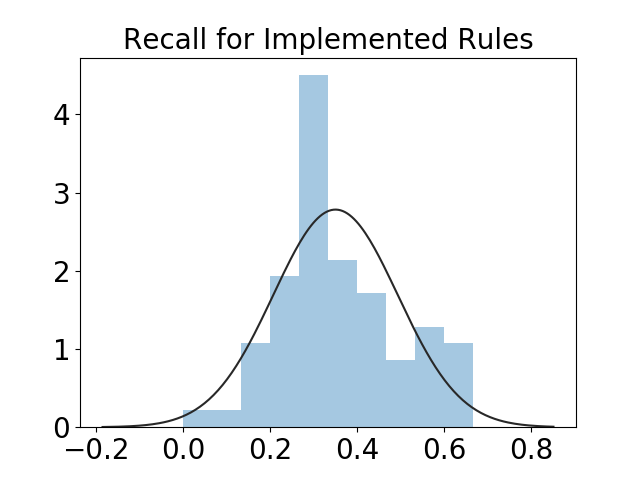

In [12]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.distplot(recall_rouge_1_ValueList, bins=10, fit=norm, kde=False)
plt.title('Recall for Implemented Rules', fontsize=20)
#plt.xlabel('ROUGE-1 Recall Score', fontsize=15)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

## Precision Calculation

In [71]:
precision_rouge_1_ValueList=list()
precision_rouge_L_ValueList=list()
for neTextIndex, neTextInput in enumerate(annotationList):
    rouge_n = compute_rouge_n(neTextJoinList[neTextIndex].split(), annotationList[neTextIndex].split(), n=1, mode='p')
    precision_rouge_1_ValueList.append(rouge_n)
    rouge_l = compute_rouge_l(neTextJoinList[neTextIndex].split(), annotationList[neTextIndex].split(), mode='p')
    precision_rouge_L_ValueList.append(rouge_l)
print(precision_rouge_1_ValueList, "  ++++ ",precision_rouge_L_ValueList)

[0.09090909090909091, 0.6666666666666666, 0.2, 0.4444444444444444, 0.75, 0.42857142857142855, 0.35714285714285715, 0.6666666666666666, 0.23529411764705882, 0.0, 0.35714285714285715, 0.6, 0.625, 0.2, 0.75, 0.18181818181818182, 0.3333333333333333, 0.4375, 0.35, 0.8333333333333334, 0.2857142857142857, 0.5, 0.6666666666666666, 0.3333333333333333, 0.15384615384615385, 0.6666666666666666, 0.6, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.34782608695652173, 0.5714285714285714, 1.0, 0.7777777777777778, 1.0, 0.5, 0.5714285714285714, 0.4166666666666667, 0.8, 0.38461538461538464, 0.6666666666666666, 0.25, 0.8, 0.5, 0.26666666666666666, 0.75, 0.8, 0.75, 0.7142857142857143, 0.75, 0.3333333333333333, 0.75, 0.4, 0.875, 0.75, 0.10526315789473684, 0.5, 0.5714285714285714, 0.4166666666666667, 1.0, 0.45454545454545453, 0.875, 0.5, 1.0, 0.18181818181818182, 0.6, 0.3333333333333333, 0.75, 0.14285714285714285, 0.3333333333333333]   ++++  [0.1111111111111111, 0.30769230769230765, 0.200000000

In [241]:
print(np.array(precision_rouge_1_ValueList).mean(), "  ++++ ",np.array(precision_rouge_L_ValueList).mean())

0.5219617814134238   ++++  0.3196565685128774


In [10]:
# precision_rouge_1_ValueList = [0.09090909090909091, 0.6666666666666666, 0.2, 0.4444444444444444, 0.75, 0.42857142857142855, 0.35714285714285715, 0.6666666666666666, 0.23529411764705882, 0.0, 0.35714285714285715, 0.6, 0.625, 0.2, 0.75, 0.18181818181818182, 0.3333333333333333, 0.4375, 0.35, 0.8333333333333334, 0.2857142857142857, 0.5, 0.6666666666666666, 0.3333333333333333, 0.15384615384615385, 0.6666666666666666, 0.6, 0.4444444444444444, 0.4444444444444444, 0.4444444444444444, 0.34782608695652173, 0.5714285714285714, 1.0, 0.7777777777777778, 1.0, 0.5, 0.5714285714285714, 0.4166666666666667, 0.8, 0.38461538461538464, 0.6666666666666666, 0.25, 0.8, 0.5, 0.26666666666666666, 0.75, 0.8, 0.75, 0.7142857142857143, 0.75, 0.3333333333333333, 0.75, 0.4, 0.875, 0.75, 0.10526315789473684, 0.5, 0.5714285714285714, 0.4166666666666667, 1.0, 0.45454545454545453, 0.875, 0.5, 1.0, 0.18181818181818182, 0.6, 0.3333333333333333, 0.75, 0.14285714285714285, 0.3333333333333333]
# precision_rouge_L_ValueList = [0.1111111111111111, 0.30769230769230765, 0.20000000000000004, 0.45161290322580644, 0.38888888888888884, 0.34782608695652173, 0.3333333333333333, 0.2222222222222222, 0.11764705882352941, 0.0, 0.16, 0.3636363636363636, 0.3, 0.16, 0.28571428571428575, 0.16666666666666669, 0.11764705882352941, 0.14634146341463414, 0.18604651162790697, 0.3333333333333333, 0.1111111111111111, 0.4210526315789474, 0.2962962962962963, 0.3157894736842105, 0.09090909090909093, 0.42105263157894735, 0.4, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.17391304347826086, 0.2758620689655172, 0.5454545454545454, 0.56, 0.5454545454545454, 0.380952380952381, 0.38095238095238093, 0.2916666666666667, 0.5, 0.18749999999999997, 0.4444444444444444, 0.11111111111111112, 0.4210526315789473, 0.3529411764705882, 0.21428571428571427, 0.4285714285714285, 0.4210526315789473, 0.4285714285714285, 0.6666666666666666, 0.4285714285714285, 0.35294117647058826, 0.4285714285714285, 0.16, 0.4666666666666667, 0.6, 0.14285714285714285, 0.28571428571428575, 0.25, 0.4, 0.6363636363636364, 0.32, 0.48275862068965514, 0.36363636363636365, 0.5454545454545454, 0.08333333333333334, 0.3333333333333333, 0.4444444444444444, 0.46153846153846156, 0.12903225806451613, 0.30769230769230765]

<IPython.core.display.Javascript object>


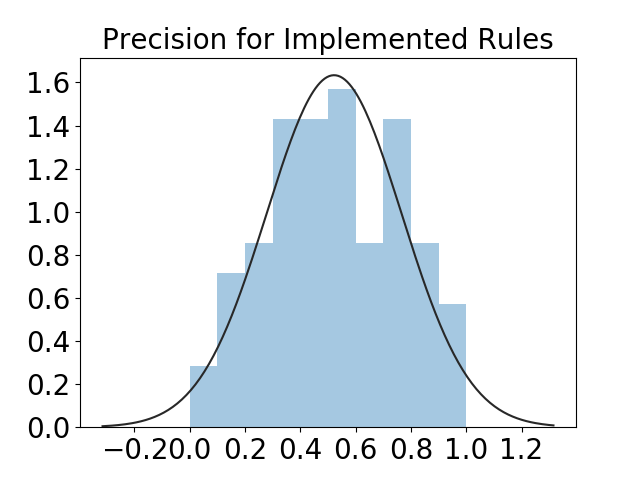

In [13]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
sns.distplot(precision_rouge_1_ValueList, bins=10, fit=norm, kde=False)
plt.title('Precision for Implemented Rules', fontsize=20)
#plt.xlabel('ROUGE-1 Precision Score', fontsize=18)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [73]:
f1_rouge_1_ValueList=list()
f1_rouge_L_ValueList=list()
for neTextIndex, neTextInput in enumerate(annotationList):
    rouge_n = compute_rouge_n(neTextJoinList[neTextIndex].split(), annotationList[neTextIndex].split(), n=1)
    f1_rouge_1_ValueList.append(rouge_n)
    rouge_l = compute_rouge_l(neTextJoinList[neTextIndex].split(), annotationList[neTextIndex].split())
    f1_rouge_L_ValueList.append(rouge_l)
print(f1_rouge_1_ValueList, "  ++++ ",f1_rouge_L_ValueList)

[0.1111111111111111, 0.6153846153846153, 0.20000000000000004, 0.5161290322580646, 0.6666666666666665, 0.5217391304347826, 0.41666666666666663, 0.4444444444444444, 0.23529411764705882, 0.0, 0.4, 0.5454545454545454, 0.5, 0.16, 0.4285714285714285, 0.16666666666666669, 0.11764705882352941, 0.34146341463414637, 0.3255813953488372, 0.5555555555555556, 0.2222222222222222, 0.4210526315789474, 0.4444444444444444, 0.3157894736842105, 0.18181818181818185, 0.42105263157894735, 0.4, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.34782608695652173, 0.5517241379310344, 0.7272727272727273, 0.56, 0.7272727272727273, 0.47619047619047616, 0.38095238095238093, 0.4166666666666667, 0.6666666666666666, 0.3125, 0.4444444444444444, 0.2777777777777778, 0.4210526315789473, 0.3529411764705882, 0.28571428571428575, 0.4285714285714285, 0.4210526315789473, 0.4285714285714285, 0.6666666666666666, 0.4285714285714285, 0.35294117647058826, 0.4285714285714285, 0.32, 0.4666666666666667, 0.6, 0.1428571428571

In [242]:
print(np.array(f1_rouge_1_ValueList).mean(), "  ++++ ",np.array(f1_rouge_L_ValueList).mean())

0.4009536058488607   ++++  0.3196565685128774


In [15]:
# f1_rouge_1_ValueList = [0.1111111111111111, 0.6153846153846153, 0.20000000000000004, 0.5161290322580646, 0.6666666666666665, 0.5217391304347826, 0.41666666666666663, 0.4444444444444444, 0.23529411764705882, 0.0, 0.4, 0.5454545454545454, 0.5, 0.16, 0.4285714285714285, 0.16666666666666669, 0.11764705882352941, 0.34146341463414637, 0.3255813953488372, 0.5555555555555556, 0.2222222222222222, 0.4210526315789474, 0.4444444444444444, 0.3157894736842105, 0.18181818181818185, 0.42105263157894735, 0.4, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.34782608695652173, 0.5517241379310344, 0.7272727272727273, 0.56, 0.7272727272727273, 0.47619047619047616, 0.38095238095238093, 0.4166666666666667, 0.6666666666666666, 0.3125, 0.4444444444444444, 0.2777777777777778, 0.4210526315789473, 0.3529411764705882, 0.28571428571428575, 0.4285714285714285, 0.4210526315789473, 0.4285714285714285, 0.6666666666666666, 0.4285714285714285, 0.35294117647058826, 0.4285714285714285, 0.32, 0.4666666666666667, 0.6, 0.14285714285714285, 0.28571428571428575, 0.5, 0.4, 0.6363636363636364, 0.4, 0.48275862068965514, 0.36363636363636365, 0.7272727272727273, 0.16666666666666669, 0.5, 0.4444444444444444, 0.46153846153846156, 0.19354838709677416, 0.30769230769230765]
# f1_rouge_L_ValueList = [0.1111111111111111, 0.30769230769230765, 0.20000000000000004, 0.45161290322580644, 0.38888888888888884, 0.34782608695652173, 0.3333333333333333, 0.2222222222222222, 0.11764705882352941, 0.0, 0.16, 0.3636363636363636, 0.3, 0.16, 0.28571428571428575, 0.16666666666666669, 0.11764705882352941, 0.14634146341463414, 0.18604651162790697, 0.3333333333333333, 0.1111111111111111, 0.4210526315789474, 0.2962962962962963, 0.3157894736842105, 0.09090909090909093, 0.42105263157894735, 0.4, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.17391304347826086, 0.2758620689655172, 0.5454545454545454, 0.56, 0.5454545454545454, 0.380952380952381, 0.38095238095238093, 0.2916666666666667, 0.5, 0.18749999999999997, 0.4444444444444444, 0.11111111111111112, 0.4210526315789473, 0.3529411764705882, 0.21428571428571427, 0.4285714285714285, 0.4210526315789473, 0.4285714285714285, 0.6666666666666666, 0.4285714285714285, 0.35294117647058826, 0.4285714285714285, 0.16, 0.4666666666666667, 0.6, 0.14285714285714285, 0.28571428571428575, 0.25, 0.4, 0.6363636363636364, 0.32, 0.48275862068965514, 0.36363636363636365, 0.5454545454545454, 0.08333333333333334, 0.3333333333333333, 0.4444444444444444, 0.46153846153846156, 0.12903225806451613, 0.30769230769230765]

<IPython.core.display.Javascript object>


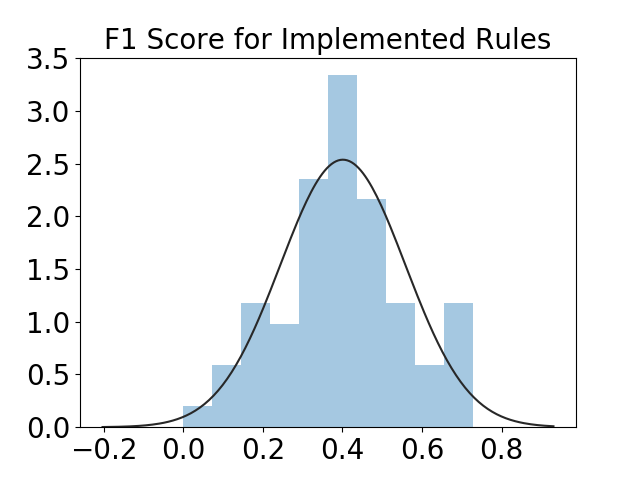

In [16]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
sns.distplot(f1_rouge_1_ValueList, bins=10, fit=norm, kde=False)
plt.title('F1 Score for Implemented Rules', fontsize=20)
#plt.xlabel('ROUGE-1 F1 Score', fontsize=18)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [144]:
def token_merge(tweet_300_auto_label_ruleDF, docID):
    rowIndexList=tweet_300_auto_label_ruleDF.index[tweet_300_auto_label_ruleDF['tweetNum'] == docID].tolist()
    sysText=''
    for idx, rowIndex in enumerate(rowIndexList):
        if (tweet_300_auto_label_ruleDF['tag'][rowIndex]!='None'):
            sysText = sysText+' '+ tweet_300_auto_label_ruleDF['word'][rowIndex]
        if (tweet_300_auto_label_ruleDF['tag'][rowIndex]=='None'):
            if (tweet_300_auto_label_ruleDF['ner_iob'][rowIndex]!= 'None' and tweet_300_auto_label_ruleDF['ner_tag'][rowIndex]!= 'None'):
                sysText = sysText+' '+ tweet_300_auto_label_ruleDF['word'][rowIndex]
    return sysText

In [145]:
keyPraseText_dict = dict()
annotationDict = dict()
tweet_300_auto_label_ruleDF = pd.read_csv('300Tweet_autoLabel_rule_V2.csv', sep=',', engine='python')

for docID in set(tweet_300_auto_label_ruleDF['tweetNum']):
    keyPraseText_dict[docID] = token_merge(tweet_300_auto_label_ruleDF, docID)

In [147]:
transannotationDF = annotationDF.T
transannotationDF['merged'] = transannotationDF.stack().astype(str).groupby(level=0).agg(' '.join)
annotationDict = transannotationDF['merged'].to_dict()

In [158]:
# compute_rouge_n(list(concat(summs)), list(concat(abs_sents)), n=1)
auto_ruleLabel_recall_rouge_1_ValueList=list()
auto_ruleLabel_recall_rouge_L_ValueList=list()
for keyIndex in annotationDict.keys():
    rouge_n = compute_rouge_n(keyPraseText_dict[int(keyIndex)].split(), annotationDict[keyIndex].split(), n=1, mode='r')
    auto_ruleLabel_recall_rouge_1_ValueList.append(rouge_n)
    rouge_l = compute_rouge_l(keyPraseText_dict[int(keyIndex)].split(), annotationDict[keyIndex].split(), mode='r')
    auto_ruleLabel_recall_rouge_L_ValueList.append(rouge_l)
print(auto_ruleLabel_recall_rouge_1_ValueList, "  ++++ ",auto_ruleLabel_recall_rouge_L_ValueList)

[0.7142857142857143, 0.2857142857142857, 0.0, 0.6153846153846154, 0.3, 0.8888888888888888, 0.9, 0.7142857142857143, 0.6666666666666666, 0.0, 0.5294117647058824, 0.0, 0.7272727272727273, 0.6666666666666666, 0.0, 0.7333333333333333, 0.1, 0.8461538461538461, 0.6470588235294118, 0.21428571428571427, 0.36, 0.391304347826087, 0.0, 0.5454545454545454, 0.36363636363636365, 0.3888888888888889, 0.0, 0.2, 0.4, 0.2777777777777778, 0.0, 0.4, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.30434782608695654, 0.6, 0.2, 0.6666666666666666, 0.5294117647058824, 0.25, 0.5714285714285714, 0.0, 0.5714285714285714, 0.5454545454545454, 0.5, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5714285714285714, 0.42105263157894735, 0.13333333333333333, 0.17647058823529413, 0.25, 0.4166666666666667, 0.3125, 0.35714285714285715, 0.2727272727272727, 0.23076923076923078, 0.2, 0.35714285714285715, 0.2, 0.0, 0.2, 0.0, 0.2, 0.3333333333333333, 0.22727272727272727, 0.5, 0.55555

In [243]:
print(np.array(auto_ruleLabel_recall_rouge_1_ValueList).mean(), "  ++++ ",np.array(auto_ruleLabel_recall_rouge_L_ValueList).mean())

0.28522488188775375   ++++  0.26933097916165283


In [17]:
auto_ruleLabel_recall_rouge_1_ValueList = [0.7142857142857143, 0.2857142857142857, 0.0, 0.6153846153846154, 0.3, 0.8888888888888888, 0.9, 0.7142857142857143, 0.6666666666666666, 0.0, 0.5294117647058824, 0.0, 0.7272727272727273, 0.6666666666666666, 0.0, 0.7333333333333333, 0.1, 0.8461538461538461, 0.6470588235294118, 0.21428571428571427, 0.36, 0.391304347826087, 0.0, 0.5454545454545454, 0.36363636363636365, 0.3888888888888889, 0.0, 0.2, 0.4, 0.2777777777777778, 0.0, 0.4, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.30434782608695654, 0.6, 0.2, 0.6666666666666666, 0.5294117647058824, 0.25, 0.5714285714285714, 0.0, 0.5714285714285714, 0.5454545454545454, 0.5, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5714285714285714, 0.42105263157894735, 0.13333333333333333, 0.17647058823529413, 0.25, 0.4166666666666667, 0.3125, 0.35714285714285715, 0.2727272727272727, 0.23076923076923078, 0.2, 0.35714285714285715, 0.2, 0.0, 0.2, 0.0, 0.2, 0.3333333333333333, 0.22727272727272727, 0.5, 0.5555555555555556, 0.1, 0.0, 0.3076923076923077, 0.0, 0.35714285714285715, 0.19047619047619047, 0.0, 0.2857142857142857, 0.5714285714285714, 0.0, 0.2222222222222222, 0.2222222222222222, 0.15384615384615385, 0.11764705882352941, 0.25, 0.2857142857142857, 0.3333333333333333, 0.1111111111111111, 0.4, 0.0, 0.0]
auto_ruleLabel_recall_rouge_L_ValueList = [0.7142857142857143, 0.2857142857142857, 0.0, 0.46153846153846156, 0.3, 0.7777777777777778, 0.9, 0.5714285714285714, 0.6666666666666666, 0.0, 0.5294117647058824, 0.0, 0.5454545454545454, 0.5, 0.0, 0.7333333333333333, 0.1, 0.8461538461538461, 0.5882352941176471, 0.14285714285714285, 0.32, 0.391304347826087, 0.0, 0.5454545454545454, 0.2727272727272727, 0.3888888888888889, 0.0, 0.2, 0.4, 0.2777777777777778, 0.0, 0.4, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.30434782608695654, 0.5333333333333333, 0.13333333333333333, 0.6666666666666666, 0.5294117647058824, 0.25, 0.5714285714285714, 0.0, 0.5714285714285714, 0.5454545454545454, 0.5, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5714285714285714, 0.3157894736842105, 0.13333333333333333, 0.17647058823529413, 0.25, 0.4166666666666667, 0.3125, 0.35714285714285715, 0.2727272727272727, 0.23076923076923078, 0.2, 0.35714285714285715, 0.2, 0.0, 0.2, 0.0, 0.2, 0.3333333333333333, 0.22727272727272727, 0.3333333333333333, 0.5555555555555556, 0.1, 0.0, 0.3076923076923077, 0.0, 0.35714285714285715, 0.19047619047619047, 0.0, 0.2857142857142857, 0.5714285714285714, 0.0, 0.2222222222222222, 0.2222222222222222, 0.15384615384615385, 0.11764705882352941, 0.25, 0.2857142857142857, 0.3333333333333333, 0.1111111111111111, 0.4, 0.0, 0.0]

<IPython.core.display.Javascript object>


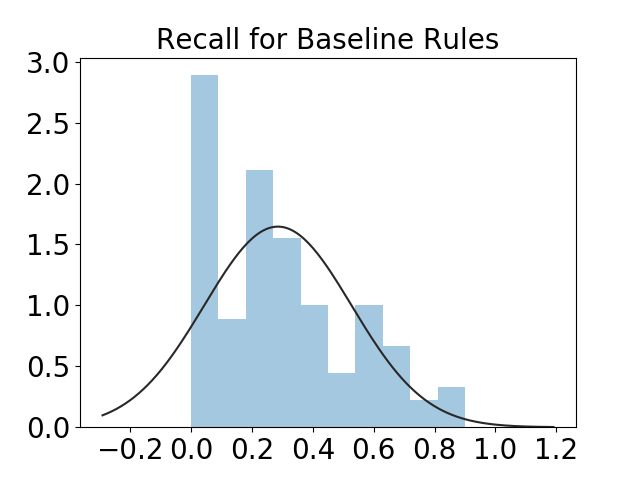

In [18]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.distplot(auto_ruleLabel_recall_rouge_1_ValueList, bins=10, fit=norm, kde=False)
plt.title('Recall for Baseline Rules', fontsize=20)
#plt.xlabel('ROUGE-1 Recall Score', fontsize=18)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [161]:
auto_ruleLabel_precision_rouge_1_ValueList=list()
auto_ruleLabel_precision_rouge_L_ValueList=list()
for keyIndex in annotationDict.keys():
    rouge_n = compute_rouge_n(keyPraseText_dict[int(keyIndex)].split(), annotationDict[keyIndex].split(), n=1, mode='p')
    auto_ruleLabel_precision_rouge_1_ValueList.append(rouge_n)
    rouge_l = compute_rouge_l(keyPraseText_dict[int(keyIndex)].split(), annotationDict[keyIndex].split(), mode='p')
    auto_ruleLabel_precision_rouge_L_ValueList.append(rouge_l)
print(auto_ruleLabel_precision_rouge_1_ValueList, "  ++++ ",auto_ruleLabel_precision_rouge_L_ValueList)

[0.20833333333333334, 0.125, 0.0, 0.1951219512195122, 0.16666666666666666, 0.32, 0.3, 0.15151515151515152, 0.6666666666666666, 0.0, 0.2, 0.0, 0.32, 0.36363636363636365, 0.0, 0.3333333333333333, 0.125, 0.3333333333333333, 0.22916666666666666, 0.375, 0.225, 0.20930232558139536, 0.0, 0.3, 0.2222222222222222, 0.25925925925925924, 0.0, 0.2, 0.23529411764705882, 0.14705882352941177, 0.0, 0.4, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.15555555555555556, 0.2647058823529412, 0.10714285714285714, 0.5, 0.18, 0.36363636363636365, 0.5, 0.0, 0.5, 0.25, 0.30434782608695654, 0.0975609756097561, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21052631578947367, 0.4, 0.3076923076923077, 0.18181818181818182, 0.21428571428571427, 0.36363636363636365, 0.625, 0.125, 0.625, 0.3333333333333333, 0.075, 0.2857142857142857, 0.625, 0.2857142857142857, 0.0, 0.2857142857142857, 0.0, 0.2857142857142857, 0.19230769230769232, 0.2777777777777778, 0.1875, 0.1, 0.07692307692307693, 0.0, 0.16666

In [244]:
print(np.array(auto_ruleLabel_precision_rouge_1_ValueList).mean(), "  ++++ ",np.array(auto_ruleLabel_precision_rouge_L_ValueList).mean())

0.19409675363882578   ++++  0.20454555937900737


In [19]:
# auto_ruleLabel_precision_rouge_1_ValueList = [0.20833333333333334, 0.125, 0.0, 0.1951219512195122, 0.16666666666666666, 0.32, 0.3, 0.15151515151515152, 0.6666666666666666, 0.0, 0.2, 0.0, 0.32, 0.36363636363636365, 0.0, 0.3333333333333333, 0.125, 0.3333333333333333, 0.22916666666666666, 0.375, 0.225, 0.20930232558139536, 0.0, 0.3, 0.2222222222222222, 0.25925925925925924, 0.0, 0.2, 0.23529411764705882, 0.14705882352941177, 0.0, 0.4, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.15555555555555556, 0.2647058823529412, 0.10714285714285714, 0.5, 0.18, 0.36363636363636365, 0.5, 0.0, 0.5, 0.25, 0.30434782608695654, 0.0975609756097561, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21052631578947367, 0.4, 0.3076923076923077, 0.18181818181818182, 0.21428571428571427, 0.36363636363636365, 0.625, 0.125, 0.625, 0.3333333333333333, 0.075, 0.2857142857142857, 0.625, 0.2857142857142857, 0.0, 0.2857142857142857, 0.0, 0.2857142857142857, 0.19230769230769232, 0.2777777777777778, 0.1875, 0.1, 0.07692307692307693, 0.0, 0.16666666666666666, 0.0, 0.20833333333333334, 0.2857142857142857, 0.0, 0.2857142857142857, 0.5, 0.0, 0.21052631578947367, 0.21052631578947367, 0.09090909090909091, 0.09523809523809523, 0.36363636363636365, 0.2857142857142857, 0.1111111111111111, 0.1111111111111111, 0.08695652173913043, 0.0, 0.0]
# auto_ruleLabel_precision_rouge_L_ValueList = [0.3225806451612903, 0.17391304347826086, 0.0, 0.2222222222222222, 0.21428571428571427, 0.4117647058823529, 0.45000000000000007, 0.2, 0.6666666666666666, 0.0, 0.2903225806451613, 0.0, 0.3333333333333333, 0.3529411764705882, 0.0, 0.45833333333333326, 0.11111111111111112, 0.47826086956521735, 0.3076923076923077, 0.18181818181818182, 0.24615384615384614, 0.2727272727272727, 0.0, 0.3870967741935483, 0.20689655172413793, 0.3111111111111111, 0.0, 0.20000000000000004, 0.29629629629629634, 0.1923076923076923, 0.0, 0.4000000000000001, 0.14285714285714288, 0.14285714285714288, 0.14285714285714288, 0.2058823529411765, 0.326530612244898, 0.09302325581395349, 0.5714285714285715, 0.26865671641791045, 0.2962962962962963, 0.5333333333333333, 0.0, 0.5333333333333333, 0.34285714285714286, 0.3783783783783784, 0.12307692307692307, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22857142857142856, 0.47058823529411764, 0.26666666666666666, 0.15384615384615383, 0.1935483870967742, 0.2962962962962963, 0.5, 0.17857142857142858, 0.45454545454545453, 0.3, 0.11320754716981132, 0.23529411764705882, 0.45454545454545453, 0.23529411764705882, 0.0, 0.23529411764705882, 0.0, 0.23529411764705882, 0.2439024390243902, 0.25, 0.18181818181818182, 0.16949152542372883, 0.08695652173913043, 0.0, 0.21621621621621623, 0.0, 0.2631578947368421, 0.22857142857142854, 0.0, 0.2857142857142857, 0.5333333333333333, 0.0, 0.21621621621621623, 0.21621621621621623, 0.1142857142857143, 0.10526315789473684, 0.2962962962962963, 0.2857142857142857, 0.16666666666666666, 0.1111111111111111, 0.14285714285714285, 0.0, 0.0]

<IPython.core.display.Javascript object>


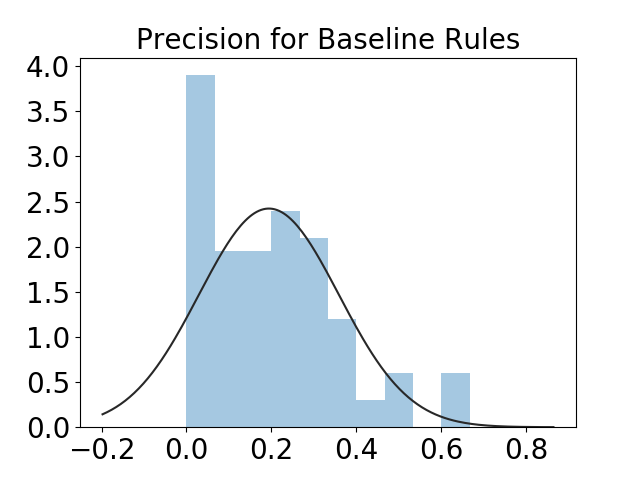

In [20]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
sns.distplot(auto_ruleLabel_precision_rouge_1_ValueList, bins=10, fit=norm, kde=False)
plt.title('Precision for Baseline Rules', fontsize=20)
# plt.xlabel('ROUGE-1 Precision Score', fontsize=18)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [163]:
auto_ruleLabel_f1_rouge_1_ValueList=list()
auto_ruleLabel_f1_rouge_L_ValueList=list()
for keyIndex in annotationDict.keys():
    rouge_n = compute_rouge_n(keyPraseText_dict[int(keyIndex)].split(), annotationDict[keyIndex].split(), n=1)
    auto_ruleLabel_f1_rouge_1_ValueList.append(rouge_n)
    rouge_l = compute_rouge_l(keyPraseText_dict[int(keyIndex)].split(), annotationDict[keyIndex].split())
    auto_ruleLabel_f1_rouge_L_ValueList.append(rouge_l)
print(auto_ruleLabel_f1_rouge_1_ValueList, "  ++++ ",auto_ruleLabel_f1_rouge_L_ValueList)

[0.3225806451612903, 0.17391304347826086, 0.0, 0.29629629629629634, 0.21428571428571427, 0.47058823529411764, 0.45000000000000007, 0.25, 0.6666666666666666, 0.0, 0.2903225806451613, 0.0, 0.4444444444444444, 0.4705882352941177, 0.0, 0.45833333333333326, 0.11111111111111112, 0.47826086956521735, 0.3384615384615385, 0.2727272727272727, 0.27692307692307694, 0.2727272727272727, 0.0, 0.3870967741935483, 0.27586206896551724, 0.3111111111111111, 0.0, 0.20000000000000004, 0.29629629629629634, 0.1923076923076923, 0.0, 0.4000000000000001, 0.1904761904761905, 0.1904761904761905, 0.1904761904761905, 0.2058823529411765, 0.36734693877551017, 0.13953488372093023, 0.5714285714285715, 0.26865671641791045, 0.2962962962962963, 0.5333333333333333, 0.0, 0.5333333333333333, 0.34285714285714286, 0.3783783783783784, 0.12307692307692307, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22857142857142856, 0.47058823529411764, 0.35555555555555557, 0.15384615384615383, 0.1935483870967742, 0.2962962962962963, 0.

In [245]:
print(np.array(auto_ruleLabel_f1_rouge_1_ValueList).mean(), "  ++++ ",np.array(auto_ruleLabel_f1_rouge_L_ValueList).mean())

0.21497607858102857   ++++  0.20454555937900737


In [21]:
auto_ruleLabel_f1_rouge_1_ValueList = [0.3225806451612903, 0.17391304347826086, 0.0, 0.29629629629629634, 0.21428571428571427, 0.47058823529411764, 0.45000000000000007, 0.25, 0.6666666666666666, 0.0, 0.2903225806451613, 0.0, 0.4444444444444444, 0.4705882352941177, 0.0, 0.45833333333333326, 0.11111111111111112, 0.47826086956521735, 0.3384615384615385, 0.2727272727272727, 0.27692307692307694, 0.2727272727272727, 0.0, 0.3870967741935483, 0.27586206896551724, 0.3111111111111111, 0.0, 0.20000000000000004, 0.29629629629629634, 0.1923076923076923, 0.0, 0.4000000000000001, 0.1904761904761905, 0.1904761904761905, 0.1904761904761905, 0.2058823529411765, 0.36734693877551017, 0.13953488372093023, 0.5714285714285715, 0.26865671641791045, 0.2962962962962963, 0.5333333333333333, 0.0, 0.5333333333333333, 0.34285714285714286, 0.3783783783783784, 0.12307692307692307, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22857142857142856, 0.47058823529411764, 0.35555555555555557, 0.15384615384615383, 0.1935483870967742, 0.2962962962962963, 0.5, 0.17857142857142858, 0.45454545454545453, 0.3, 0.11320754716981132, 0.23529411764705882, 0.45454545454545453, 0.23529411764705882, 0.0, 0.23529411764705882, 0.0, 0.23529411764705882, 0.2439024390243902, 0.25, 0.2727272727272727, 0.16949152542372883, 0.08695652173913043, 0.0, 0.21621621621621623, 0.0, 0.2631578947368421, 0.22857142857142854, 0.0, 0.2857142857142857, 0.5333333333333333, 0.0, 0.21621621621621623, 0.21621621621621623, 0.1142857142857143, 0.10526315789473684, 0.2962962962962963, 0.2857142857142857, 0.16666666666666666, 0.1111111111111111, 0.14285714285714285, 0.0, 0.0]
auto_ruleLabel_f1_rouge_L_ValueList = [0.3225806451612903, 0.17391304347826086, 0.0, 0.2222222222222222, 0.21428571428571427, 0.4117647058823529, 0.45000000000000007, 0.2, 0.6666666666666666, 0.0, 0.2903225806451613, 0.0, 0.3333333333333333, 0.3529411764705882, 0.0, 0.45833333333333326, 0.11111111111111112, 0.47826086956521735, 0.3076923076923077, 0.18181818181818182, 0.24615384615384614, 0.2727272727272727, 0.0, 0.3870967741935483, 0.20689655172413793, 0.3111111111111111, 0.0, 0.20000000000000004, 0.29629629629629634, 0.1923076923076923, 0.0, 0.4000000000000001, 0.14285714285714288, 0.14285714285714288, 0.14285714285714288, 0.2058823529411765, 0.326530612244898, 0.09302325581395349, 0.5714285714285715, 0.26865671641791045, 0.2962962962962963, 0.5333333333333333, 0.0, 0.5333333333333333, 0.34285714285714286, 0.3783783783783784, 0.12307692307692307, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22857142857142856, 0.47058823529411764, 0.26666666666666666, 0.15384615384615383, 0.1935483870967742, 0.2962962962962963, 0.5, 0.17857142857142858, 0.45454545454545453, 0.3, 0.11320754716981132, 0.23529411764705882, 0.45454545454545453, 0.23529411764705882, 0.0, 0.23529411764705882, 0.0, 0.23529411764705882, 0.2439024390243902, 0.25, 0.18181818181818182, 0.16949152542372883, 0.08695652173913043, 0.0, 0.21621621621621623, 0.0, 0.2631578947368421, 0.22857142857142854, 0.0, 0.2857142857142857, 0.5333333333333333, 0.0, 0.21621621621621623, 0.21621621621621623, 0.1142857142857143, 0.10526315789473684, 0.2962962962962963, 0.2857142857142857, 0.16666666666666666, 0.1111111111111111, 0.14285714285714285, 0.0, 0.0]

<IPython.core.display.Javascript object>


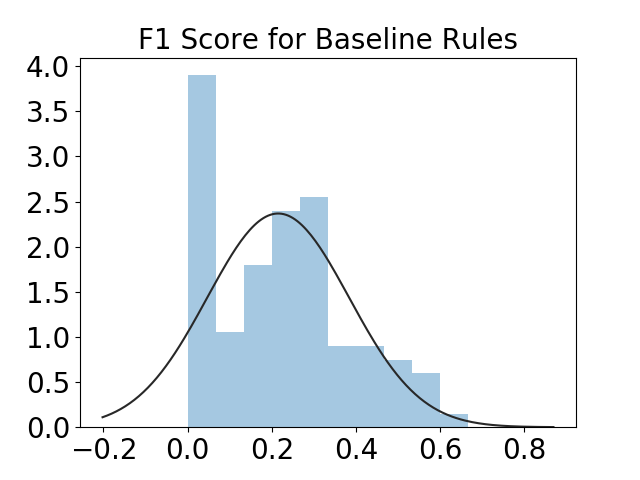

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 10 Text yticklabel objects>)

In [23]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
sns.distplot(auto_ruleLabel_f1_rouge_1_ValueList, bins=10, fit=norm, kde=False)
plt.title('F1 Score for Baseline Rules', fontsize=20)
# plt.xlabel('ROUGE-1 F1 Score', fontsize=18)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 20)
plt.yticks(size = 20)

<IPython.core.display.Javascript object>


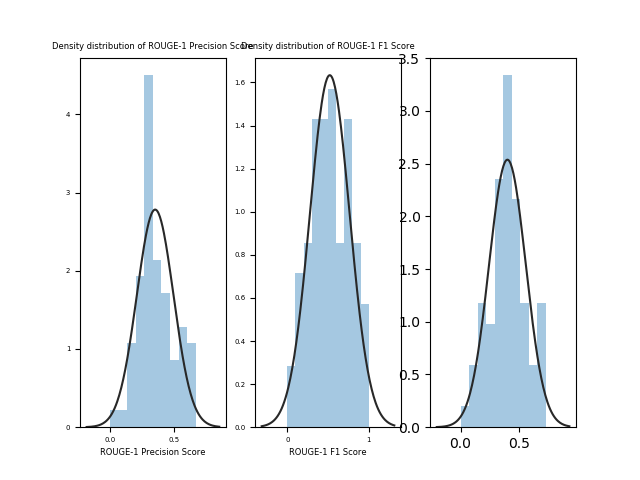

In [238]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# fig, ax = plt.subplots(2, 3)

plt.title('Density distribution of ROUGE-1 Recall Score', fontsize=6)
plt.xlabel('ROUGE-1 Recall Score', fontsize=6)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.subplot(1, 3, 1)
sns.distplot(recall_rouge_1_ValueList, bins=10, fit=norm, kde=False)


plt.title('Density distribution of ROUGE-1 Precision Score', fontsize=6)
plt.xlabel('ROUGE-1 Precision Score', fontsize=6)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.subplot(1, 3, 2)
sns.distplot(precision_rouge_1_ValueList, bins=10, fit=norm, kde=False)


plt.title('Density distribution of ROUGE-1 F1 Score', fontsize=6)
plt.xlabel('ROUGE-1 F1 Score', fontsize=6)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.subplot(1, 3, 3)
sns.distplot(f1_rouge_1_ValueList, bins=10, fit=norm, kde=False)

plt.show()

<IPython.core.display.Javascript object>


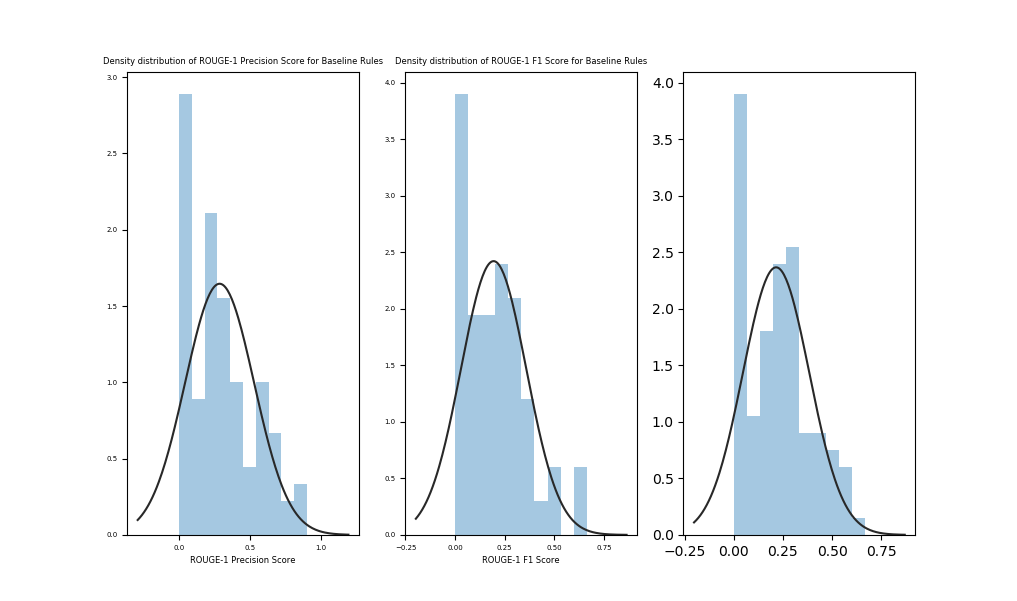

In [236]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

plt.title('Density distribution of ROUGE-1 Recall Score for Baseline Rules', fontsize=6)
plt.xlabel('ROUGE-1 Recall Score', fontsize=6)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.subplot(1, 3, 1)
sns.distplot(auto_ruleLabel_recall_rouge_1_ValueList, bins=10, fit=norm, kde=False)


plt.title('Density distribution of ROUGE-1 Precision Score for Baseline Rules', fontsize=6)
plt.xlabel('ROUGE-1 Precision Score', fontsize=6)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.subplot(1, 3, 2)
sns.distplot(auto_ruleLabel_precision_rouge_1_ValueList, bins=10, fit=norm, kde=False)


plt.title('Density distribution of ROUGE-1 F1 Score for Baseline Rules', fontsize=6)
plt.xlabel('ROUGE-1 F1 Score', fontsize=6)
#plt.ylabel('Y-Label', fontsize=12)
plt.xticks(size = 5)
plt.yticks(size = 5)
plt.subplot(1, 3, 3)
sns.distplot(auto_ruleLabel_f1_rouge_1_ValueList, bins=10, fit=norm, kde=False)

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.6, 
#                     hspace=0.6)
plt.show()